<a href="https://colab.research.google.com/github/armin-lawi/ForcastingStockPrice-with-Grouped-Dataset/blob/main/GRU/GroupPredict_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation Data**

In [ ]:
# Install required Libraries
!pip install pandas_datareader

In [ ]:
# Install required Libraries
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 18.9 MB/s 
     |████████████████████████████████| 6.4 MB 26.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
## Import Libraries and set information
from pandas_datareader import data as pdr
from datetime import date

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import square, mean
from keras.utils.vis_utils import plot_model
import yfinance as yf

yf.pdr_override()

# Get Current Date
today = date.today()
currentDate = today.strftime("%Y-%m-%d")

# Set Info
start_date = '2010-01-01'
end_date = currentDate
stockName = ['AMZN','GOOGL','BLL','QCOM']
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# Data AMZN
stock_amzn = pdr.get_data_yahoo(stockName[0], start_date, end_date)
stock_amzn

[*********************100%***********************]  1 of 1 completed


Open         High  ...    Adj Close    Volume
Date                                  ...                       
2010-01-04   136.250000   136.610001  ...   133.899994   7599900
2010-01-05   133.429993   135.479996  ...   134.690002   8851900
2010-01-06   134.600006   134.729996  ...   132.250000   7178800
2010-01-07   132.009995   132.320007  ...   130.000000  11030200
2010-01-08   130.559998   133.679993  ...   133.520004   9830500
...                 ...          ...  ...          ...       ...
2022-01-28  2817.209961  2879.959961  ...  2879.560059   3719600
2022-01-31  2895.000000  3007.209961  ...  2991.469971   3915400
2022-02-01  3000.000000  3034.159912  ...  3023.870117   2961000
2022-02-02  3101.010010  3101.500000  ...  3012.250000   4366500
2022-02-03  2834.750000  2884.949951  ...  2776.909912  11172200

[3044 rows x 6 columns]

In [ ]:
# Data GOOGL
stock_googl = pdr.get_data_yahoo(stockName[1], start_date, end_date)
stock_googl

[*********************100%***********************]  1 of 1 completed


Open         High  ...    Adj Close    Volume
Date                                  ...                       
2010-01-04   313.788788   315.070068  ...   313.688690   3908488
2010-01-05   313.903900   314.234222  ...   312.307312   6003391
2010-01-06   313.243256   313.243256  ...   304.434448   7949443
2010-01-07   305.005005   305.305298  ...   297.347351  12815771
2010-01-08   296.296295   301.926941  ...   301.311310   9439151
...                 ...          ...  ...          ...       ...
2022-01-28  2593.179932  2667.129883  ...  2667.020020   1718100
2022-01-31  2683.239990  2709.459961  ...  2706.070068   1999300
2022-02-01  2751.889893  2755.860107  ...  2752.879883   3432200
2022-02-02  3025.000000  3030.929932  ...  2960.000000   6160000
2022-02-03  2914.110107  2993.500000  ...  2861.800049   3567500

[3044 rows x 6 columns]

In [ ]:
# Data BLL
stock_bll = pdr.get_data_yahoo(stockName[2], start_date, end_date)
stock_bll

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-01-04  12.965000  13.137500  12.955000  13.122500  11.862237  2468400
2010-01-05  13.082500  13.095000  12.937500  12.975000  11.728904  3053600
2010-01-06  12.980000  13.030000  12.910000  13.000000  11.751500  1879200
2010-01-07  12.935000  12.987500  12.872500  12.970000  11.724381  2105600
2010-01-08  12.877500  13.060000  12.832500  13.017500  11.767321  1227600
...               ...        ...        ...        ...        ...      ...
2022-01-28  94.239998  95.599998  92.529999  93.500000  93.500000  3098300
2022-01-31  93.980003  97.430000  93.550003  97.099998  97.099998  2662500
2022-02-01  97.500000  97.989998  95.419998  96.570000  96.570000  2559800
2022-02-02  96.489998  96.550003  94.120003  94.459999  94.459999  1833100
2022-02-03  93.849998  94.470001  92.559998  93.120003  93.120003  1474100

[3044 rows x 6 columns]

In [ ]:
# Data QCOM
stock_qcom = pdr.get_data_yahoo(stockName[3], start_date, end_date)
stock_qcom

[*********************100%***********************]  1 of 1 completed


Open        High  ...   Adj Close    Volume
Date                                ...                      
2010-01-04   46.790001   47.310001  ...   34.300831  14570200
2010-01-05   47.520000   48.320000  ...   35.126572  24241000
2010-01-06   48.259998   48.430000  ...   34.783112  22743800
2010-01-07   47.750000   49.020000  ...   35.791542  25266300
2010-01-08   49.110001   49.799999  ...   36.149601  25938200
...                ...         ...  ...         ...       ...
2022-01-28  162.009995  166.940002  ...  166.809998  10320800
2022-01-31  167.059998  175.949997  ...  175.759995  11273500
2022-02-01  176.440002  177.429993  ...  177.130005   9724600
2022-02-02  180.940002  188.639999  ...  188.199997  25646300
2022-02-03  180.800003  192.100006  ...  179.100006  35965800

[3044 rows x 6 columns]

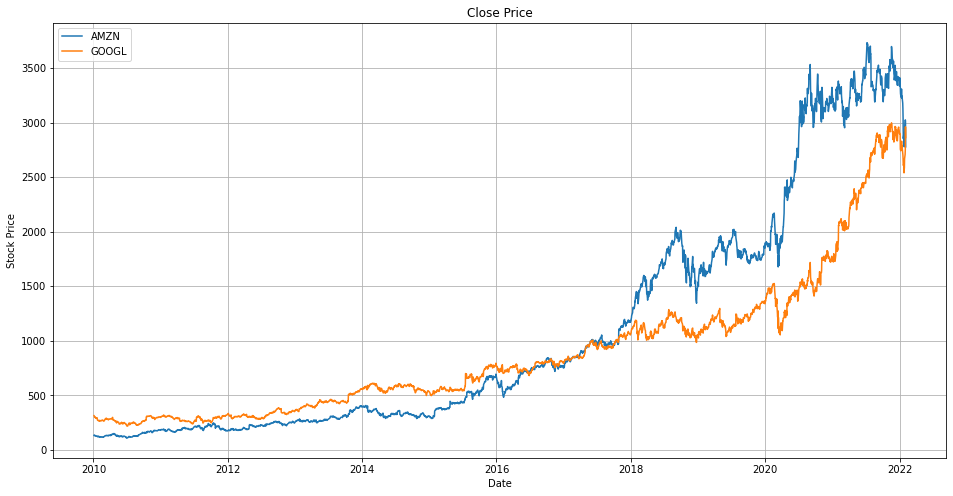

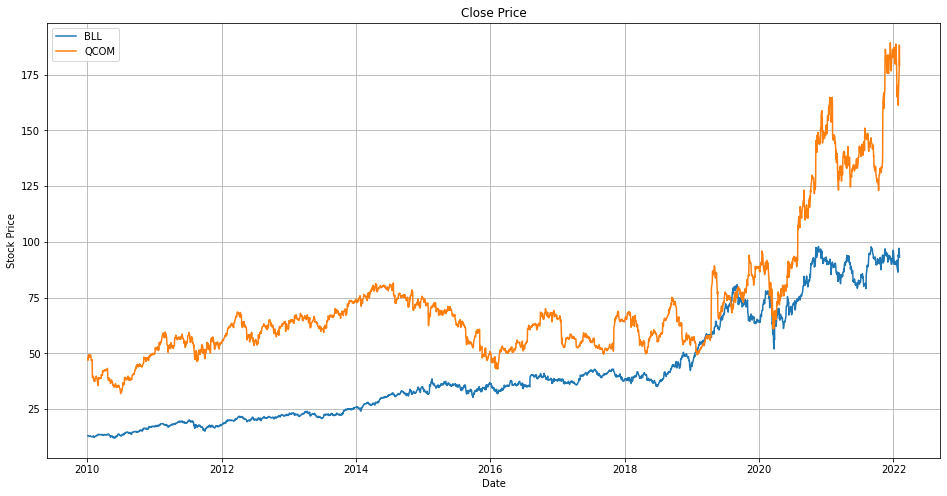

In [ ]:
# Visualization data

#close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(stock_amzn['Close'])
plt.plot(stock_googl['Close'])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['AMZN','GOOGL'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

#close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(stock_bll['Close'])
plt.plot(stock_qcom['Close'])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['BLL','QCOM'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

In [ ]:
# Extract Clossing price
data_amzn = stock_amzn.filter(['Close'])
dataset_amzn = data_amzn.values
# Extract Clossing price
data_googl = stock_googl.filter(['Close'])
dataset_googl = data_googl.values
# Extract Clossing price
data_bll = stock_bll.filter(['Close'])
dataset_bll = data_bll.values
# Extract Clossing price
data_qcom = stock_qcom.filter(['Close'])
dataset_qcom = data_qcom.values

In [ ]:
# Rename column
data_amzn.rename(columns={'Close': 'Close_amzn'}, inplace=True)
data_googl.rename(columns={'Close': 'Close_googl'}, inplace=True)
data_bll.rename(columns={'Close': 'Close_bll'}, inplace=True)
data_qcom.rename(columns={'Close': 'Close_qcom'}, inplace=True)

In [ ]:
# Preprocess the data AMZN
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_amzn = normalizer.fit_transform(dataset_amzn) # values between 0,1
print(normalizedData_amzn)

[[6.98078666e-03]
 [7.19885240e-03]
 [6.52533951e-03]
 [5.90427291e-03]
 [6.87589827e-03]
 [5.98984142e-03]
 [5.17279406e-03]
 [5.65860674e-03]
 [5.17279406e-03]
 [5.11482810e-03]
 [5.24456235e-03]
 [4.73942768e-03]
 [4.97129363e-03]
 [3.53869935e-03]
 [3.22954544e-03]
 [3.00044248e-03]
 [3.90305833e-03]
 [4.80843508e-03]
 [4.63729807e-03]
 [2.83206426e-03]
 [2.62504206e-03]
 [2.89554988e-03]
 [2.02329745e-03]
 [2.42353953e-03]
 [2.26896363e-03]
 [2.60019830e-03]
 [2.41525897e-03]
 [3.16881860e-03]
 [3.05012789e-03]
 [2.46218350e-03]
 [2.12542706e-03]
 [2.61400062e-03]
 [2.45942262e-03]
 [2.59467863e-03]
 [2.38213466e-03]
 [3.06668899e-03]
 [2.64712283e-03]
 [2.70233001e-03]
 [4.39715157e-03]
 [4.67042028e-03]
 [4.76979110e-03]
 [5.49850907e-03]
 [5.60340166e-03]
 [5.93463634e-03]
 [5.57856001e-03]
 [6.04504649e-03]
 [6.89245938e-03]
 [6.40664880e-03]
 [6.21618771e-03]
 [6.39836404e-03]
 [6.27415156e-03]
 [6.66611309e-03]
 [6.00088496e-03]
 [6.03400716e-03]
 [5.70000950e-03]
 [5.363253

In [ ]:
# Storing the number of data points in the array
num_data_amzn = len(normalizedData_amzn)
num_days_used = 40
data_used_amzn = np.array([normalizedData_amzn[i : i + num_days_used].copy() for i in range(num_data_amzn - num_days_used)])

data_to_predict_amzn = np.array(normalizedData_amzn[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_amzn = stock_amzn.index[num_days_used:num_data_amzn]

# Storing the scaler object for prediction later
y_normaliser_amzn = MinMaxScaler()
y_normaliser_amzn.fit(data_amzn[['Close_amzn']].to_numpy()[num_days_used:])

display(normalizedData_amzn.shape, data_used_amzn.shape,data_to_predict_amzn.shape, dates_used_amzn.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_amzn.shape[0]
num_features_amzn = data_used_amzn.shape[2]
train_size_amzn = int(data_size * train_split)
test_size_amzn = data_size - train_size_amzn

# Splitting the dataset up into train and test sets
X_train_amzn = data_used_amzn[0:train_size_amzn, :, :]
y_train_amzn = data_to_predict_amzn[0:train_size_amzn, :]
dates_train_amzn = dates_used_amzn[0:train_size_amzn]
X_test_amzn = data_used_amzn[train_size_amzn:, :, :]
y_test_amzn = data_to_predict_amzn[train_size_amzn:, :]
dates_test_amzn = dates_used_amzn[train_size_amzn:]

unscaled_y_train_amzn = data_amzn['Close_amzn'].to_numpy()[(num_days_used):][0:train_size_amzn]
unscaled_y_test_amzn = data_amzn['Close_amzn'].to_numpy()[(num_days_used):][train_size_amzn:]

display("X_train shape:", X_train_amzn.shape, "X_test shape:", X_test_amzn.shape, "y_train shape:", y_train_amzn.shape, "y_test shape:", y_test_amzn.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data GOOGL
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_googl = normalizer.fit_transform(dataset_googl) # values between 0,1
print(normalizedData_googl)

[[3.43476207e-02]
 [3.38504568e-02]
 [3.10169797e-02]
 [2.84663033e-02]
 [2.98929489e-02]
 [2.97290325e-02]
 [2.78142184e-02]
 [2.72035740e-02]
 [2.77007379e-02]
 [2.59264345e-02]
 [2.72990418e-02]
 [2.60002869e-02]
 [2.64632265e-02]
 [2.05242682e-02]
 [1.87211444e-02]
 [1.91570648e-02]
 [1.90994239e-02]
 [1.76925923e-02]
 [1.69090142e-02]
 [1.74638189e-02]
 [1.71215760e-02]
 [1.88688602e-02]
 [1.63397991e-02]
 [1.71521977e-02]
 [1.75448875e-02]
 [1.80798782e-02]
 [1.77214128e-02]
 [1.80726731e-02]
 [1.74818317e-02]
 [1.89553216e-02]
 [1.83987045e-02]
 [1.93011780e-02]
 [1.88580525e-02]
 [1.92255134e-02]
 [1.78330920e-02]
 [1.71846208e-02]
 [1.62767544e-02]
 [1.63434017e-02]
 [1.74043768e-02]
 [1.89120909e-02]
 [1.96794465e-02]
 [2.13492757e-02]
 [2.30821497e-02]
 [2.27705175e-02]
 [2.23580137e-02]
 [2.52869696e-02]
 [2.61317913e-02]
 [2.58435757e-02]
 [2.28966180e-02]
 [2.32604763e-02]
 [2.33253223e-02]
 [2.34766407e-02]
 [2.23237894e-02]
 [2.18734588e-02]
 [2.03423390e-02]
 [2.184283

In [ ]:
# Storing the number of data points in the array
num_data_googl = len(normalizedData_googl)
num_days_used = 40
data_used_googl = np.array([normalizedData_googl[i : i + num_days_used].copy() for i in range(num_data_googl - num_days_used)])

data_to_predict_googl = np.array(normalizedData_googl[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_googl = stock_googl.index[num_days_used:num_data_googl]

# Storing the scaler object for prediction later
y_normaliser_googl = MinMaxScaler()
y_normaliser_googl.fit(data_googl[['Close_googl']].to_numpy()[num_days_used:])
num_features_googl = data_used_googl.shape[2]

display(normalizedData_googl.shape, data_used_googl.shape,data_to_predict_googl.shape, dates_used_googl.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_googl.shape[0]
num_features_googl = data_used_googl.shape[2]
train_size_googl = int(data_size * train_split)
test_size_googl = data_size - train_size_googl

# Splitting the dataset up into train and test sets
X_train_googl = data_used_googl[0:train_size_googl, :, :]
y_train_googl = data_to_predict_googl[0:train_size_amzn, :]
dates_train_googl = dates_used_googl[0:train_size_googl]
X_test_googl = data_used_googl[train_size_googl:, :, :]
y_test_googl = data_to_predict_googl[train_size_googl:, :]
dates_test_googl = dates_used_googl[train_size_googl:]

unscaled_y_train_googl = data_googl['Close_googl'].to_numpy()[(num_days_used):][0:train_size_googl]
unscaled_y_test_googl = data_googl['Close_googl'].to_numpy()[(num_days_used):][train_size_googl:]

display("X_train shape:", X_train_googl.shape, "X_test shape:", X_test_googl.shape, "y_train shape:", y_train_googl.shape, "y_test shape:", y_test_googl.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data BLL
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_bll = normalizer.fit_transform(dataset_bll) # values between 0,1
print(normalizedData_bll)

[[1.23474810e-02]
 [1.06293176e-02]
 [1.09205272e-02]
 [1.05710735e-02]
 [1.11243762e-02]
 [1.03380969e-02]
 [1.01051314e-02]
 [1.07166783e-02]
 [1.00177596e-02]
 [9.20236382e-03]
 [1.07749224e-02]
 [9.26060797e-03]
 [8.41608453e-03]
 [7.57156109e-03]
 [7.60068872e-03]
 [6.72704876e-03]
 [6.40671152e-03]
 [6.66880462e-03]
 [7.39683977e-03]
 [7.74629353e-03]
 [1.15320741e-02]
 [9.58094521e-03]
 [5.06712952e-03]
 [6.69792114e-03]
 [5.82428118e-03]
 [6.75616528e-03]
 [5.35833913e-03]
 [8.15399143e-03]
 [9.14411968e-03]
 [1.10370155e-02]
 [1.13573527e-02]
 [1.35123306e-02]
 [1.27551789e-02]
 [1.29007837e-02]
 [1.18232948e-02]
 [1.38909119e-02]
 [1.42112492e-02]
 [1.68612967e-02]
 [1.84920883e-02]
 [1.72981111e-02]
 [1.84629718e-02]
 [1.80552739e-02]
 [1.93657394e-02]
 [1.79387856e-02]
 [1.68612967e-02]
 [1.71233898e-02]
 [1.81135180e-02]
 [1.80552739e-02]
 [1.74728435e-02]
 [1.81426345e-02]
 [1.91036463e-02]
 [1.76475760e-02]
 [1.73272387e-02]
 [1.71816339e-02]
 [1.82591228e-02]
 [1.674480

In [ ]:
# Storing the number of data points in the array
num_data_bll = len(normalizedData_bll)
num_days_used = 40
data_used_bll = np.array([normalizedData_bll[i : i + num_days_used].copy() for i in range(num_data_bll - num_days_used)])

data_to_predict_bll = np.array(normalizedData_bll[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_bll = stock_bll.index[num_days_used:num_data_bll]

# Storing the scaler object for prediction later
y_normaliser_bll = MinMaxScaler()
y_normaliser_bll.fit(data_bll[['Close_bll']].to_numpy()[num_days_used:])
num_features_bll = data_used_bll.shape[2]

display(normalizedData_bll.shape, data_used_bll.shape,data_to_predict_bll.shape, dates_used_bll.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_bll.shape[0]
num_features_bll = data_used_bll.shape[2]
train_size_bll = int(data_size * train_split)
test_size_bll = data_size - train_size_bll

# Splitting the dataset up into train and test sets
X_train_bll = data_used_bll[0:train_size_bll, :, :]
y_train_bll = data_to_predict_bll[0:train_size_bll, :]
dates_train_bll = dates_used_bll[0:train_size_bll]
X_test_bll = data_used_bll[train_size_bll:, :, :]
y_test_bll = data_to_predict_bll[train_size_bll:, :]
dates_test_bll = dates_used_bll[train_size_bll:]

unscaled_y_train_bll = data_bll['Close_bll'].to_numpy()[(num_days_used):][0:train_size_bll]
unscaled_y_test_bll = data_bll['Close_bll'].to_numpy()[(num_days_used):][train_size_bll:]

display("X_train shape:", X_train_bll.shape, "X_test shape:", X_test_bll.shape, "y_train shape:", y_train_bll.shape, "y_test shape:", y_test_bll.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data QCOM
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_qcom = normalizer.fit_transform(dataset_qcom) # values between 0,1
print(normalizedData_qcom)

[[0.09521993]
 [0.10240275]
 [0.0994152 ]
 [0.10818714]
 [0.11130182]
 [0.11015765]
 [0.10507248]
 [0.10640733]
 [0.10430969]
 [0.10532672]
 [0.11034834]
 [0.10418255]
 [0.10252988]
 [0.0942029 ]
 [0.09502924]
 [0.09490211]
 [0.09687263]
 [0.05415713]
 [0.04595728]
 [0.04964405]
 [0.04640223]
 [0.04875414]
 [0.03947368]
 [0.03864735]
 [0.03527841]
 [0.03782101]
 [0.0347699 ]
 [0.03845664]
 [0.04373253]
 [0.04487669]
 [0.04748285]
 [0.04989831]
 [0.04849988]
 [0.04481311]
 [0.04182559]
 [0.03756674]
 [0.03318079]
 [0.03000255]
 [0.02288331]
 [0.03794814]
 [0.04277905]
 [0.04633868]
 [0.043224  ]
 [0.04341471]
 [0.04271549]
 [0.04398679]
 [0.0453852 ]
 [0.04443174]
 [0.04392321]
 [0.04481311]
 [0.04411392]
 [0.05383932]
 [0.05142385]
 [0.05288584]
 [0.0544114 ]
 [0.05231375]
 [0.06502669]
 [0.06273839]
 [0.06229341]
 [0.06464532]
 [0.06356471]
 [0.06553522]
 [0.0671879 ]
 [0.06655226]
 [0.06871346]
 [0.06636157]
 [0.06489956]
 [0.06528096]
 [0.06572591]
 [0.06763285]
 [0.06826851]
 [0.06

In [ ]:
# Storing the number of data points in the array
num_data_qcom = len(normalizedData_qcom)
num_days_used = 40
data_used_qcom = np.array([normalizedData_qcom[i : i + num_days_used].copy() for i in range(num_data_qcom - num_days_used)])

data_to_predict_qcom = np.array(normalizedData_qcom[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_qcom = stock_qcom.index[num_days_used:num_data_qcom]

# Storing the scaler object for prediction later
y_normaliser_qcom = MinMaxScaler()
y_normaliser_qcom.fit(data_qcom[['Close_qcom']].to_numpy()[num_days_used:])
num_features_qcom = data_used_qcom.shape[2]

display(normalizedData_qcom.shape, data_used_qcom.shape,data_to_predict_qcom.shape, dates_used_qcom.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_qcom.shape[0]
num_features_qcom = data_used_qcom.shape[2]
train_size_qcom = int(data_size * train_split)
test_size_qcom = data_size - train_size_qcom

# Splitting the dataset up into train and test sets
X_train_qcom = data_used_qcom[0:train_size_qcom, :, :]
y_train_qcom = data_to_predict_qcom[0:train_size_qcom, :]
dates_train_qcom = dates_used_qcom[0:train_size_qcom]
X_test_qcom = data_used_qcom[train_size_qcom:, :, :]
y_test_qcom = data_to_predict_qcom[train_size_qcom:, :]
dates_test_qcom = dates_used_qcom[train_size_qcom:]

unscaled_y_train_qcom = data_qcom['Close_qcom'].to_numpy()[(num_days_used):][0:train_size_qcom]
unscaled_y_test_qcom = data_qcom['Close_qcom'].to_numpy()[(num_days_used):][train_size_qcom:]

display("X_train shape:", X_train_qcom.shape, "X_test shape:", X_test_qcom.shape, "y_train shape:", y_train_qcom.shape, "y_test shape:", y_test_qcom.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Concat the 4 stocks data
stock_df = pd.DataFrame()
stock_df = pd.concat([stock_df, data_amzn, data_googl, data_bll, data_qcom], axis=1)

In [ ]:
stock_df

Close_amzn  Close_googl  Close_bll  Close_qcom
Date                                                       
2010-01-04   133.899994   313.688690  13.122500   46.939999
2010-01-05   134.690002   312.307312  12.975000   48.070000
2010-01-06   132.250000   304.434448  13.000000   47.599998
2010-01-07   130.000000   297.347351  12.970000   48.980000
2010-01-08   133.520004   301.311310  13.017500   49.470001
...                 ...          ...        ...         ...
2022-01-28  2879.560059  2667.020020  93.500000  166.809998
2022-01-31  2991.469971  2706.070068  97.099998  175.759995
2022-02-01  3023.870117  2752.879883  96.570000  177.130005
2022-02-02  3012.250000  2960.000000  94.459999  188.199997
2022-02-03  2776.909912  2861.800049  93.120003  179.100006

[3044 rows x 4 columns]

In [ ]:
# Extract Clossing price
data = stock_df.filter(['Close_amzn','Close_googl','Close_bll','Close_qcom'])
dataset = data.values

In [ ]:
dataset

array([[ 133.8999939 ,  313.68869019,   13.12250042,   46.93999863],
       [ 134.69000244,  312.30731201,   12.97500038,   48.06999969],
       [ 132.25      ,  304.43444824,   13.        ,   47.59999847],
       [ 130.        ,  297.34735107,   12.97000027,   48.97999954],
       [ 133.52000427,  301.31130981,   13.01749992,   49.47000122],
       [ 130.30999756,  300.85586548,   12.94999981,   49.29000092],
       [ 127.34999847,  295.53552246,   12.93000031,   48.49000168],
       [ 129.11000061,  293.83883667,   12.98250008,   48.70000076],
       [ 127.34999847,  295.22021484,   12.92249966,   48.36999893],
       [ 127.13999939,  290.2902832 ,   12.85249996,   48.52999878],
       [ 127.61000061,  294.10409546,   12.98750019,   49.31999969],
       [ 125.77999878,  290.4954834 ,   12.85750008,   48.34999847],
       [ 126.62000275,  291.7817688 ,   12.78499985,   48.09000015],
       [ 121.43000031,  275.28027344,   12.71249962,   46.77999878],
       [ 120.30999756,  270.270263

In [ ]:
# Preprocess the data
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData = normalizer.fit_transform(dataset) # values between 0,1
print(normalizedData)

[[6.98078666e-03 3.43476207e-02 1.23474810e-02 9.52199312e-02]
 [7.19885240e-03 3.38504568e-02 1.06293176e-02 1.02402750e-01]
 [6.52533951e-03 3.10169797e-02 1.09205272e-02 9.94152010e-02]
 [5.90427291e-03 2.84663033e-02 1.05710735e-02 1.08187138e-01]
 [6.87589827e-03 2.98929489e-02 1.11243762e-02 1.11301819e-01]
 [5.98984142e-03 2.97290325e-02 1.03380969e-02 1.10157652e-01]
 [5.17279406e-03 2.78142184e-02 1.01051314e-02 1.05072480e-01]
 [5.65860674e-03 2.72035740e-02 1.07166783e-02 1.06407334e-01]
 [5.17279406e-03 2.77007379e-02 1.00177596e-02 1.04309686e-01]
 [5.11482810e-03 2.59264345e-02 9.20236382e-03 1.05326721e-01]
 [5.24456235e-03 2.72990418e-02 1.07749224e-02 1.10348339e-01]
 [4.73942768e-03 2.60002869e-02 9.26060797e-03 1.04182554e-01]
 [4.97129363e-03 2.64632265e-02 8.41608453e-03 1.02529882e-01]
 [3.53869935e-03 2.05242682e-02 7.57156109e-03 9.42028968e-02]
 [3.22954544e-03 1.87211444e-02 7.60068872e-03 9.50292448e-02]
 [3.00044248e-03 1.91570648e-02 6.72704876e-03 9.490211

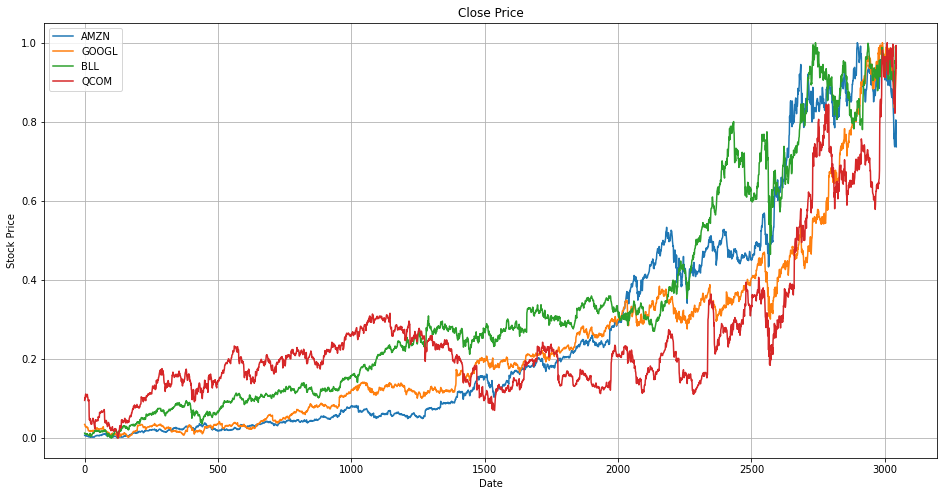

In [ ]:
# Visualization Data
#close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(normalizedData[:,:4])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['AMZN','GOOGL','BLL','QCOM'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

In [ ]:
# Storing the number of data points in the array
num_data = len(normalizedData)
num_days_used = 40
data_used = np.array([normalizedData[i : i + num_days_used].copy() for i in range(num_data - num_days_used)])

data_to_predict = np.array(normalizedData[(num_days_used):, :6])

# Creating a dates array for the dates that were used by data_used
dates_used = stock_df.index[num_days_used:num_data]

# Storing the scaler object for prediction later
y_normaliser = MinMaxScaler()
y_normaliser.fit(stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[num_days_used:])

display(normalizedData.shape, data_used.shape,data_to_predict.shape, dates_used.shape)

(3044, 4)

(3004, 40, 4)

(3004, 4)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used.shape[0]
num_features = data_used.shape[2]
train_size = int(data_size * train_split)
test_size = data_size - train_size

# Splitting the dataset up into train and test sets
X_train = data_used[0:train_size, :, :]
y_train = data_to_predict[0:train_size, :]
dates_train = dates_used[0:train_size]
X_test = data_used[train_size:, :, :]
y_test = data_to_predict[train_size:, :]
dates_test = dates_used[train_size:]

unscaled_y_train = stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[(num_days_used):][0:train_size, :]
unscaled_y_test = stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[(num_days_used):][train_size:, :]

display("X_train shape:", X_train.shape, "y_train shape:", y_train.shape, 
        "X_test shape:", X_test.shape, "y_test shape:", y_test.shape,
        "unscaled_y_train shape:", unscaled_y_train.shape, "unscaled_y_test shape:", unscaled_y_test.shape)

'X_train shape:'

(2403, 40, 4)

'y_train shape:'

(2403, 4)

'X_test shape:'

(601, 40, 4)

'y_test shape:'

(601, 4)

'unscaled_y_train shape:'

(2403, 4)

'unscaled_y_test shape:'

(601, 4)

In [ ]:
# Save data to excel
data_ = pd.DataFrame(data=data)
normalizedData_ = pd.DataFrame(data=normalizedData)

file_name1 = 'RealData.xlsx'
file_name2 = 'RealNormData.xlsx'

data_.to_excel(file_name1)
normalizedData_.to_excel(file_name2)

# **Model1**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = GRU(160, return_sequences=True, name='gru1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = GRU(160, return_sequences=True, name='gru2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = GRU(160, return_sequences=True, name='gru1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = GRU(160, return_sequences=True, name='gru2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = GRU(160, return_sequences=True, name='gru1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = GRU(160, return_sequences=True, name='gru2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = GRU(160, return_sequences=True, name='gru1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = GRU(160, return_sequences=True, name='gru2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])

output1 = GRU(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = GRU(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = GRU(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = GRU(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model3 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model3.compile(optimizer=adam, loss='mse')
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

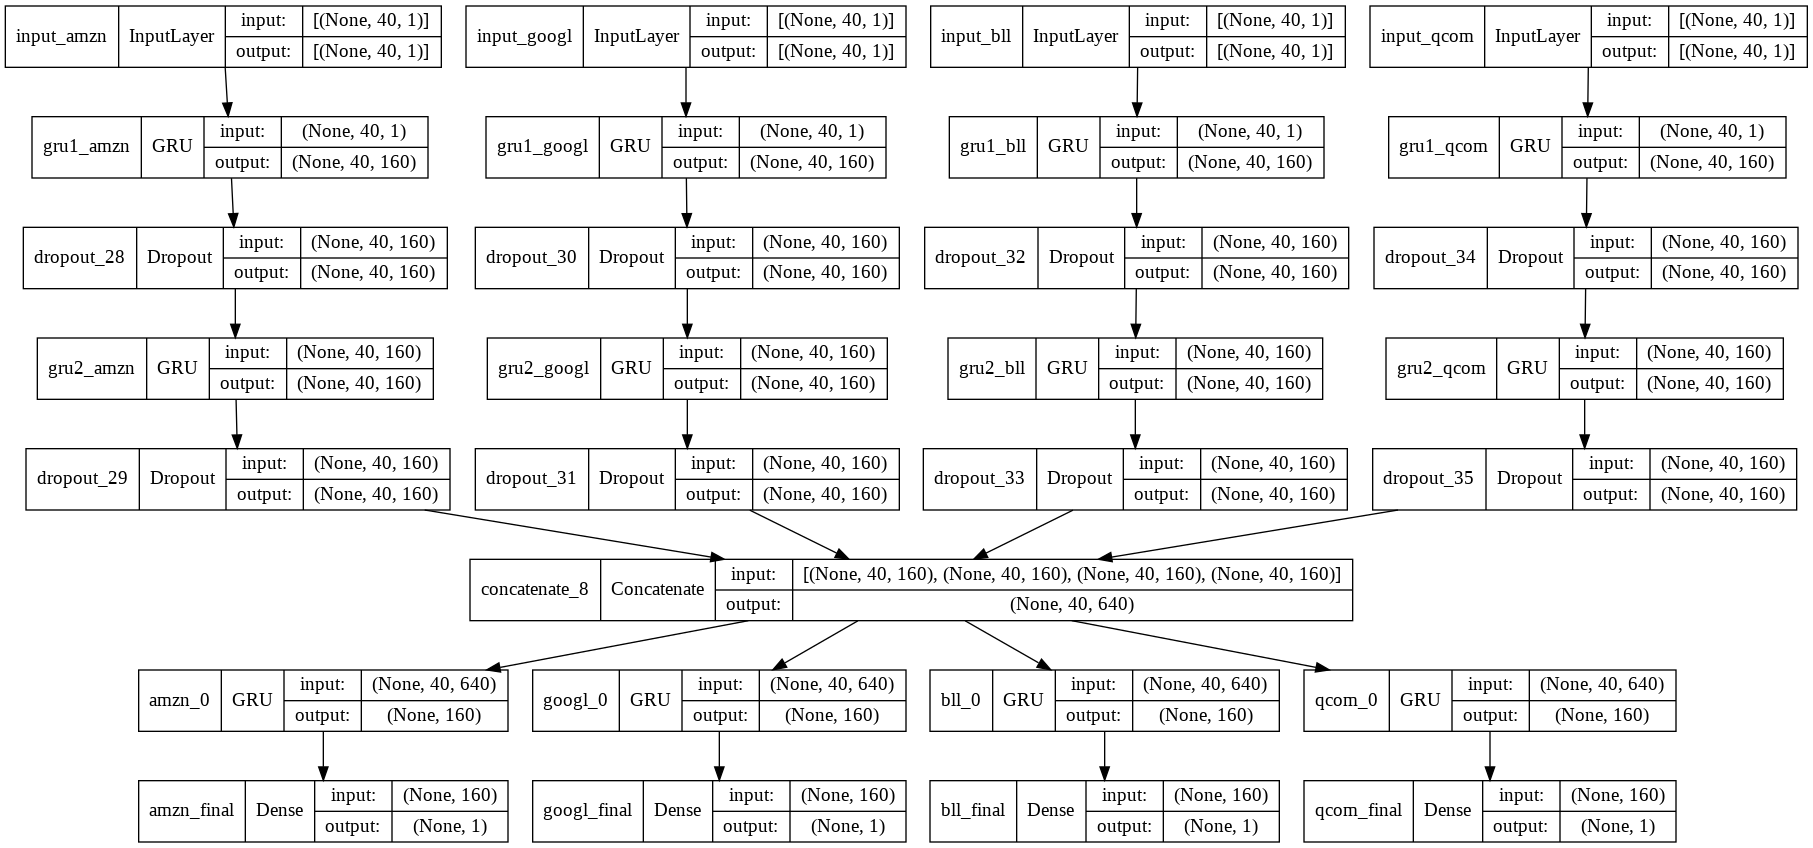

In [ ]:
# Displaying the structure of the final model
plot_model(model3, show_shapes=True)

In [ ]:
# Fitting Model
history = model3.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model3.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 83s 1s/step - loss: 0.0057 - amzn_final_loss: 9.2496e-04 - googl_final_loss: 0.0011 - bll_final_loss: 0.0016 - qcom_final_loss: 0.0021 - val_loss: 0.0130 - val_amzn_final_loss: 0.0066 - val_googl_final_loss: 0.0018 - val_bll_final_loss: 0.0028 - val_qcom_final_loss: 0.0019
Epoch 2/30
61/61 [==============================] - 58s 953ms/step - loss: 8.6781e-04 - amzn_final_loss: 1.5196e-04 - googl_final_loss: 1.6780e-04 - bll_final_loss: 3.1529e-04 - qcom_final_loss: 2.3277e-04 - val_loss: 0.0041 - val_amzn_final_loss: 0.0013 - val_googl_final_loss: 0.0015 - val_bll_final_loss: 7.9133e-04 - val_qcom_final_loss: 4.0375e-04
Epoch 3/30
61/61 [==============================] - 58s 946ms/step - loss: 5.9512e-04 - amzn_final_loss: 8.8003e-05 - googl_final_loss: 1.0781e-04 - bll_final_loss: 2.2007e-04 - qcom_final_loss: 1.7923e-04 - val_loss: 0.0035 - val_amzn_final_loss: 2.6267e-04 - val_googl_final_loss: 0.0015 - val_bll_final_loss: 7.7727e-0

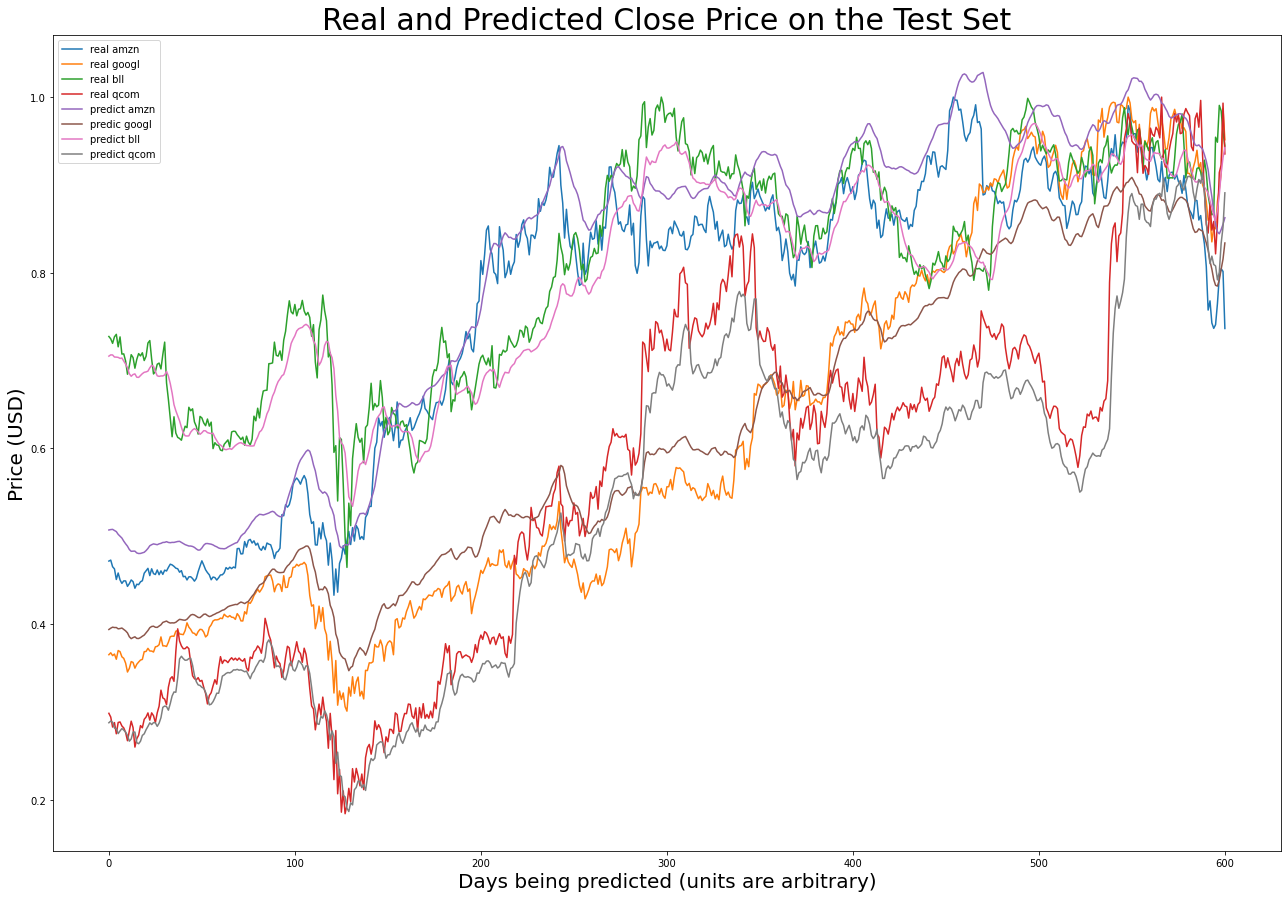

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model3.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

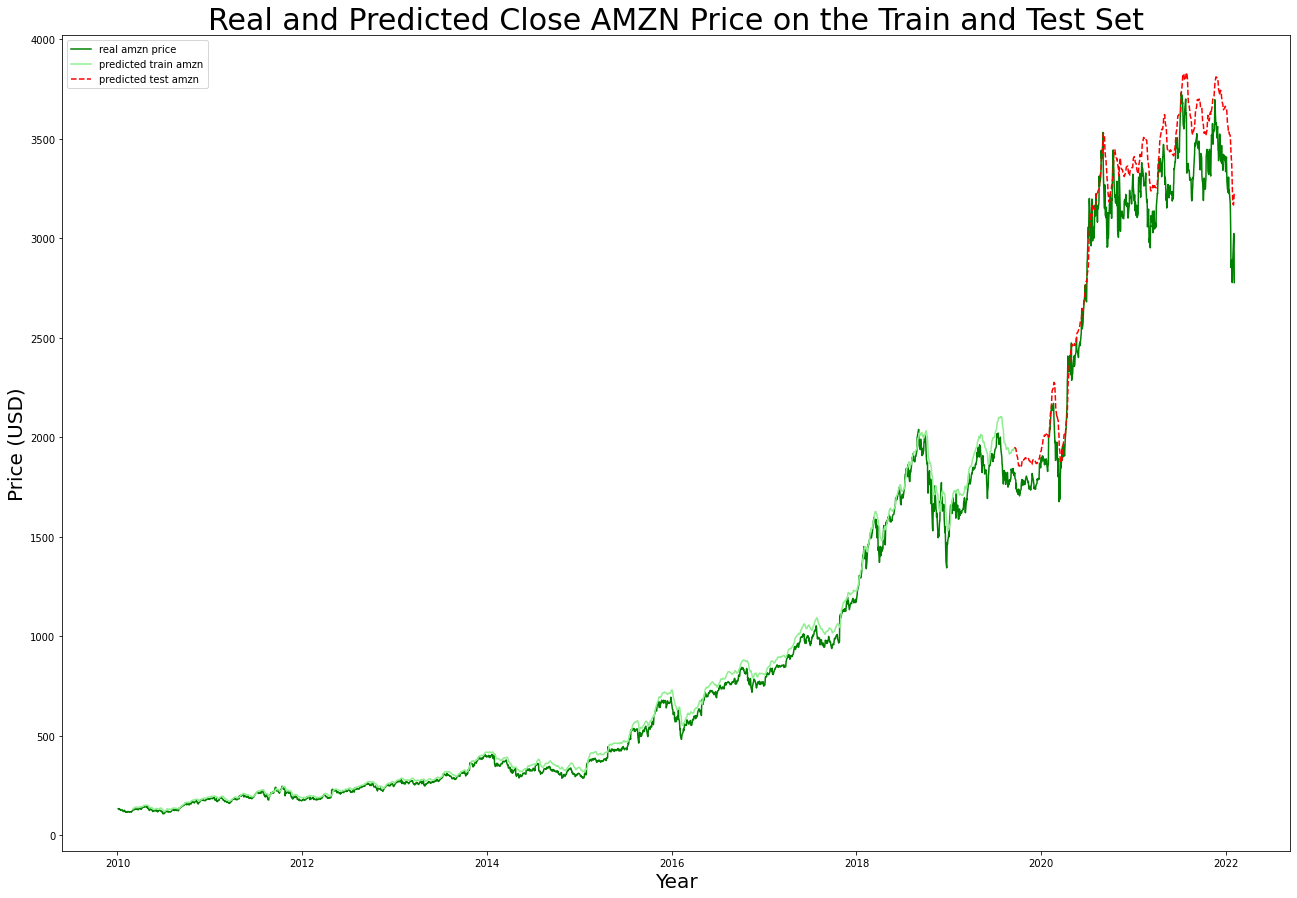

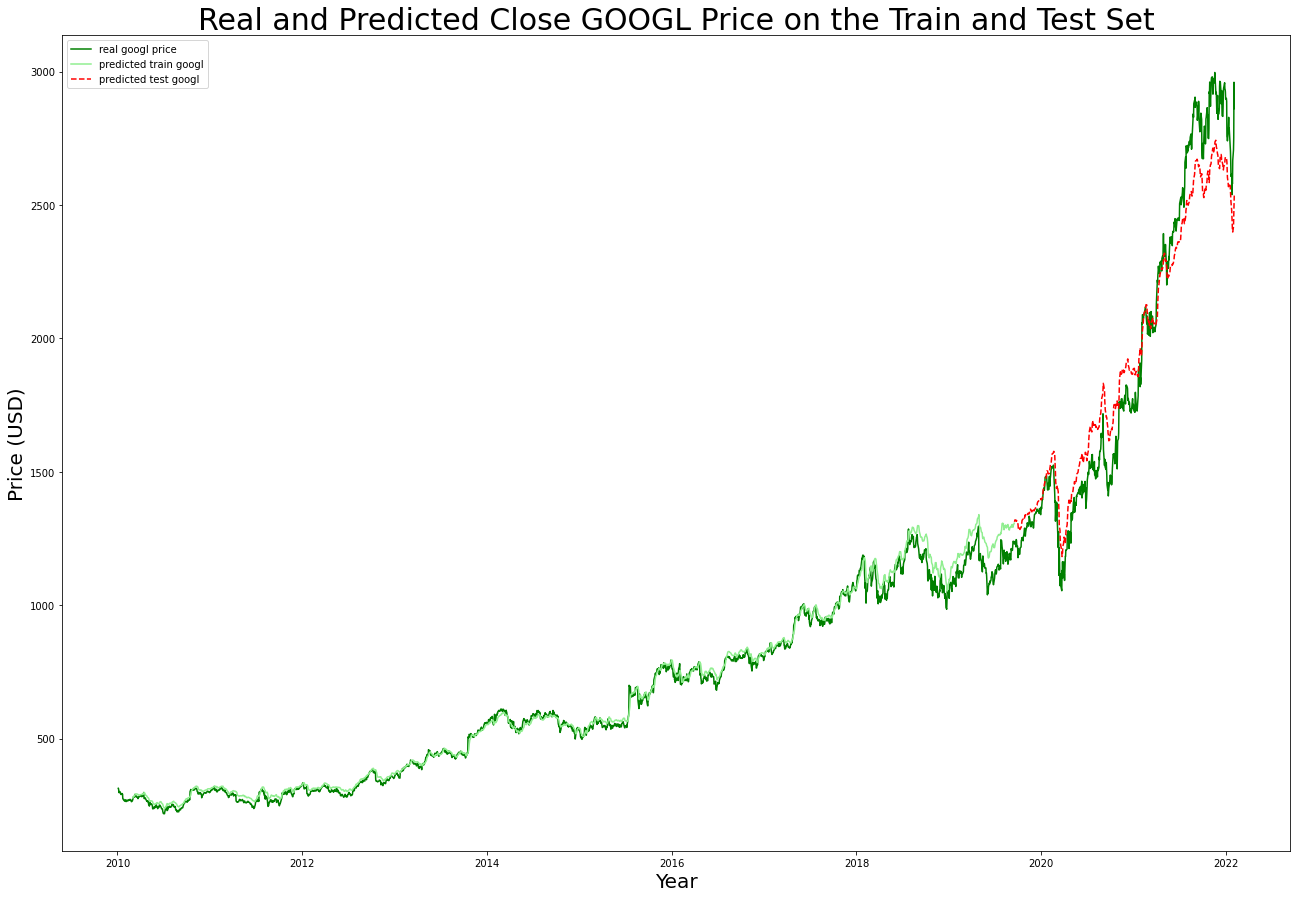

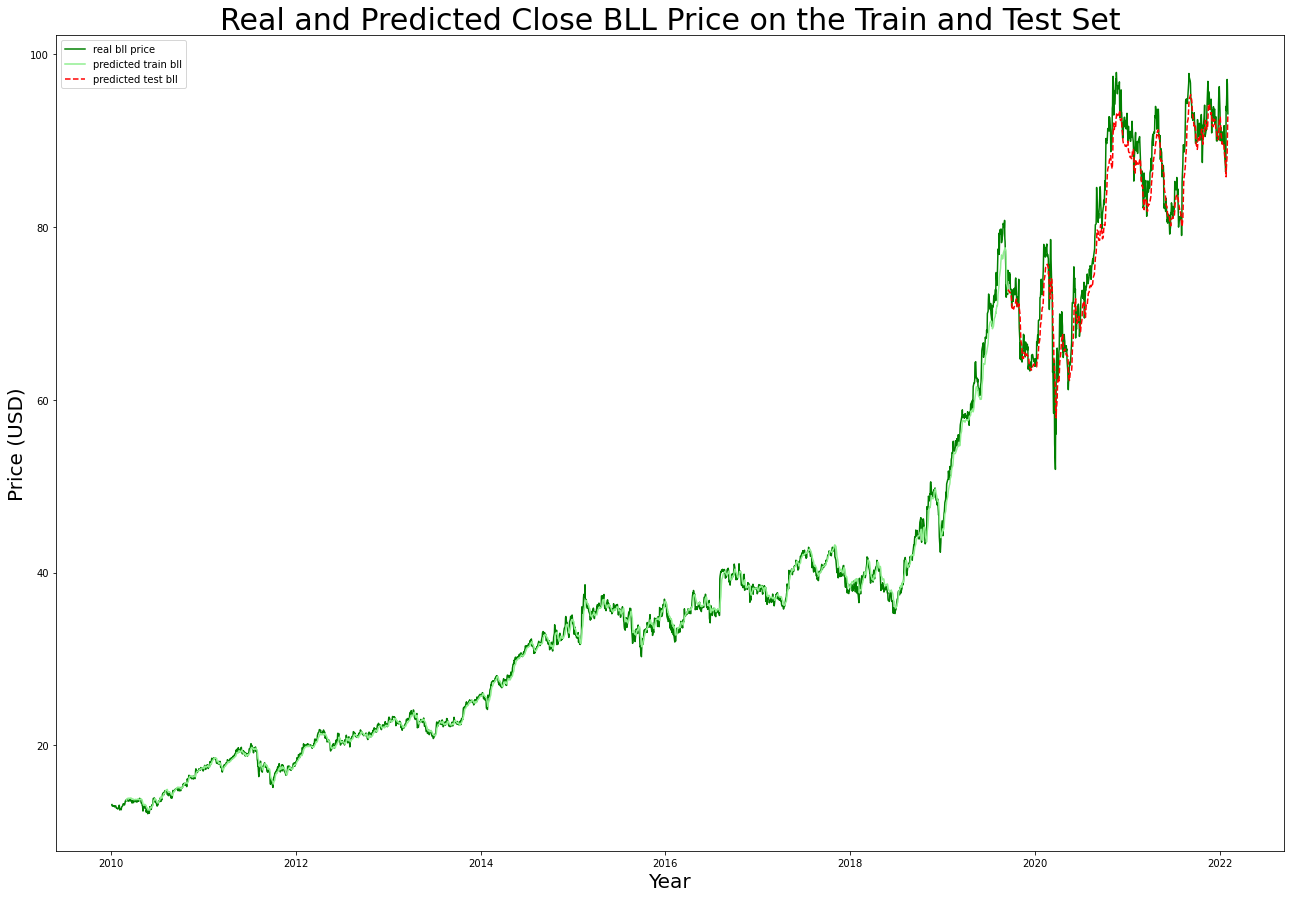

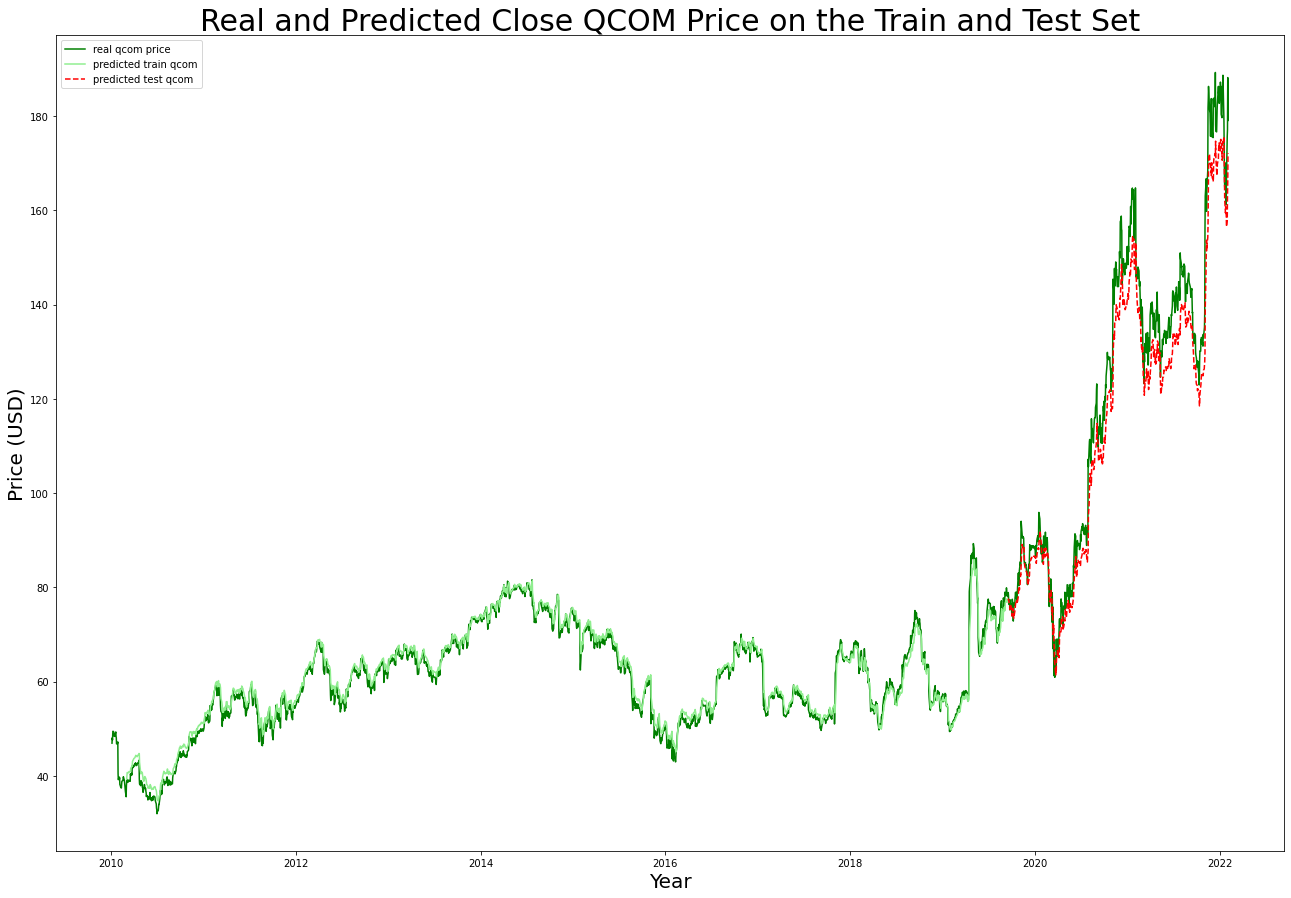

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model3.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model3.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

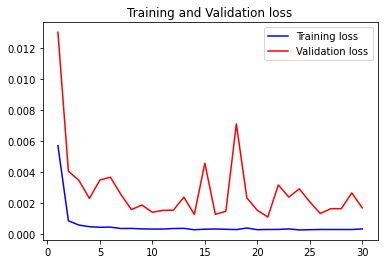

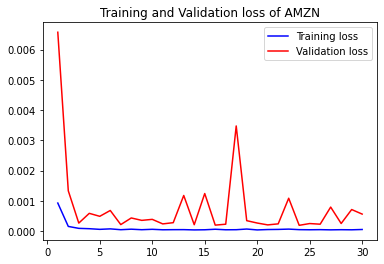

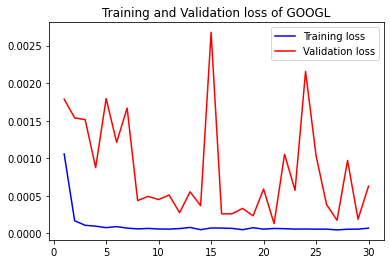

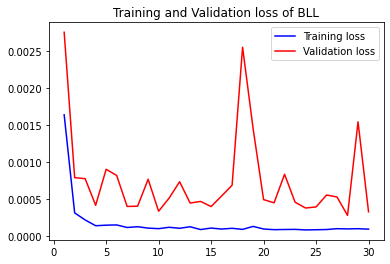

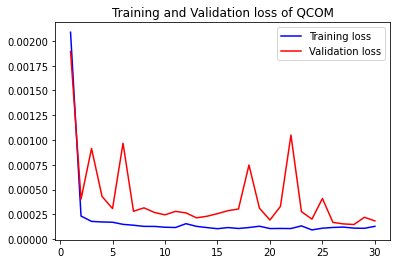

In [ ]:
# Visualization data
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 32.722004490795605 
MAE Test: 164.12692265819987 
MSE Train: 2222.709666981116 
MSE Test: 37307.750736495815 
RMSE Train1: 47.145621928033954 
RMSE Test1: 193.1521440121642 
MAPE Train: 5.607375051852196 
MAPE Test: 5.774841535577116


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 21.656116652280353 
MAE Test: 120.66382709319103 
MSE Train: 1164.4772300108646 
MSE Test: 20552.395053432185 
RMSE Train1: 34.1244374314195 
RMSE Test1: 143.36106533306798 
MAPE Train: 3.3564589703643906 
MAPE Test: 6.351702211482424


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 0.5176960845515473 
MAE Test: 2.1218890540810076 
MSE Train: 0.6888326656871865 
MSE Test: 7.282169706763173 
RMSE Train1: 0.8299594361697362 
RMSE Test1: 2.698549556106608 
MAPE Train: 1.5201926131122205 
MAPE Test: 2.630259500945456


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.221832275390625 
MAE Test: 6.2708136864787525 
MSE Train: 2.723177907004773 
MSE Test: 56.65435101383941 
RMSE Train1: 1.6502054135787982 
RMSE Test1: 7.526908463229735 
MAPE Train: 2.14947892062638 
MAPE Test: 4.888903212492718


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name11 = 'TestPredNormData3.xlsx'
file_name12 = 'TrainPredNormData3.xlsx'
file_name13 = 'TestPredData3.xlsx'
file_name14 = 'TrainPredData3.xlsx'

df_pred_test_norm.to_excel(file_name11)
df_pred_train_norm.to_excel(file_name12)
df_pred_test.to_excel(file_name13)
df_pred_train.to_excel(file_name14)

# **Model2**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = GRU(160, return_sequences=True, name='gru1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = GRU(160, return_sequences=True, name='gru2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = GRU(160, return_sequences=True, name='gru1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = GRU(160, return_sequences=True, name='gru2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = GRU(160, return_sequences=True, name='gru1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = GRU(160, return_sequences=True, name='gru2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = GRU(160, return_sequences=True, name='gru1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = GRU(160, return_sequences=True, name='gru2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = GRU(160, return_sequences=True, name='gru_conc')(conc)

output1 = GRU(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = GRU(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = GRU(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = GRU(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model4 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model4.compile(optimizer=adam, loss='mse')
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

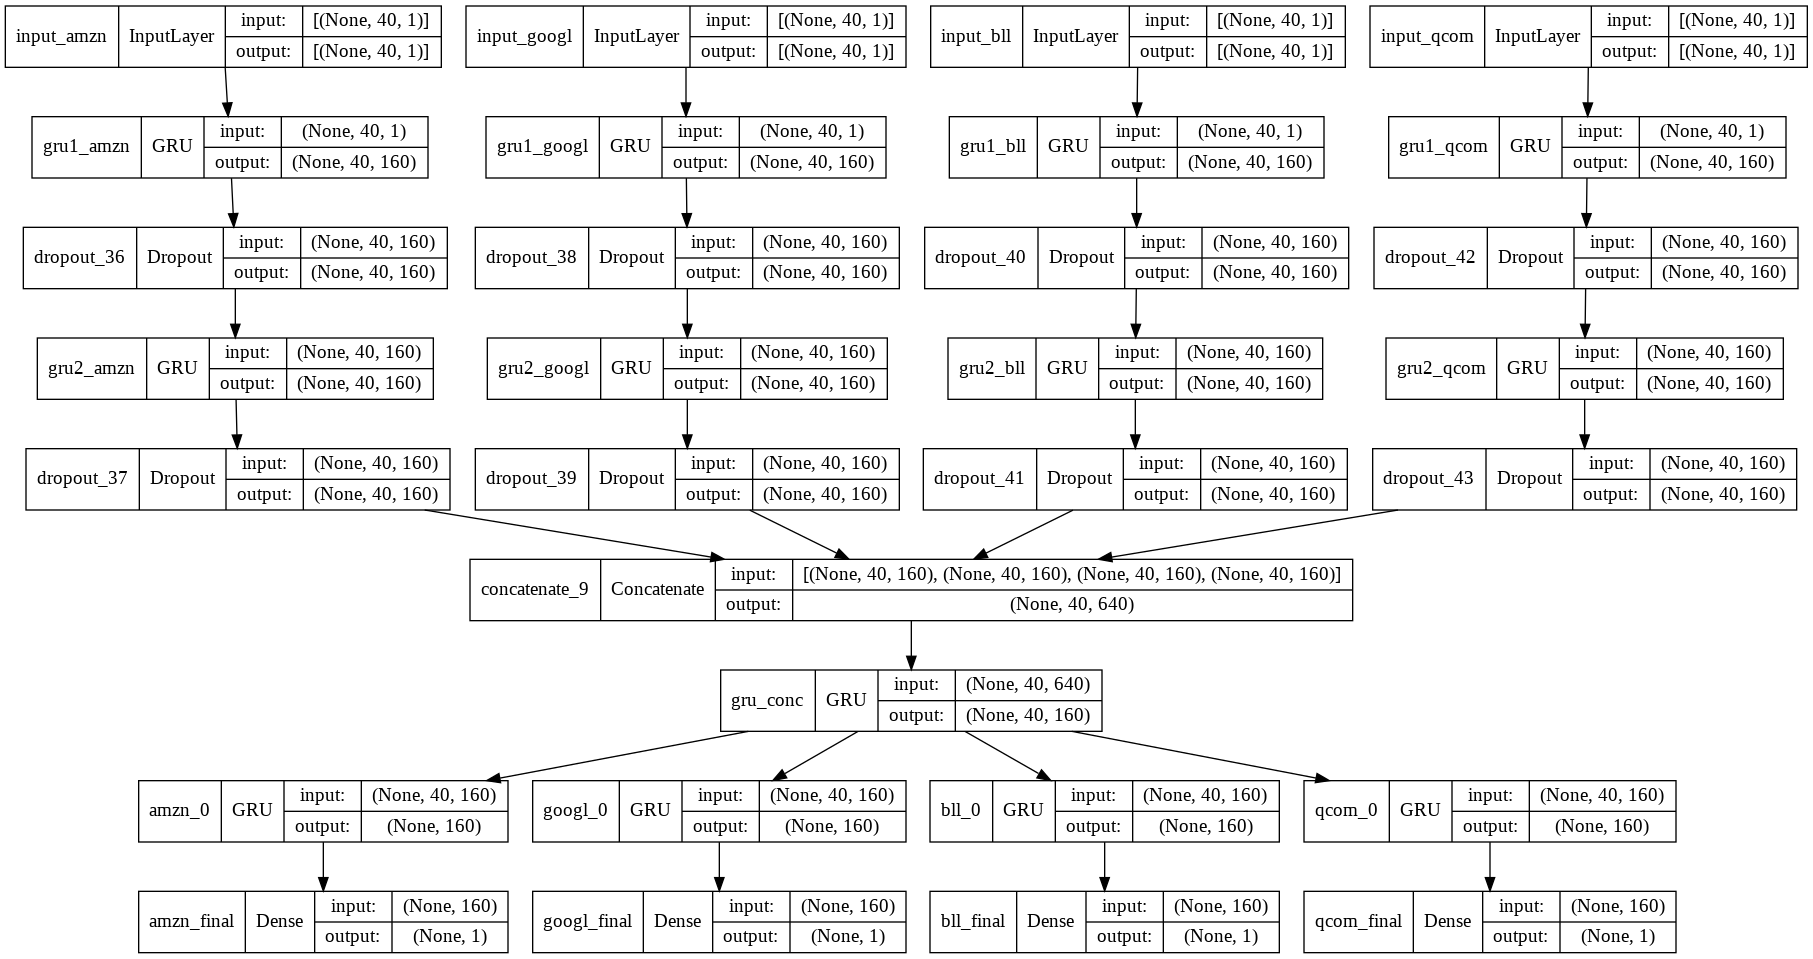

In [ ]:
# Displaying the structure of the final model
plot_model(model4, show_shapes=True)

In [ ]:
# fitting Model
history = model4.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model4.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 72s 819ms/step - loss: 0.0071 - amzn_final_loss: 9.2224e-04 - googl_final_loss: 0.0013 - bll_final_loss: 0.0023 - qcom_final_loss: 0.0025 - val_loss: 0.0185 - val_amzn_final_loss: 0.0091 - val_googl_final_loss: 0.0035 - val_bll_final_loss: 0.0039 - val_qcom_final_loss: 0.0021
Epoch 2/30
61/61 [==============================] - 46s 749ms/step - loss: 6.8319e-04 - amzn_final_loss: 1.0077e-04 - googl_final_loss: 1.6435e-04 - bll_final_loss: 2.0449e-04 - qcom_final_loss: 2.1358e-04 - val_loss: 0.0092 - val_amzn_final_loss: 0.0014 - val_googl_final_loss: 0.0052 - val_bll_final_loss: 0.0015 - val_qcom_final_loss: 0.0010
Epoch 3/30
61/61 [==============================] - 45s 744ms/step - loss: 5.5225e-04 - amzn_final_loss: 7.6349e-05 - googl_final_loss: 1.2033e-04 - bll_final_loss: 1.6365e-04 - qcom_final_loss: 1.9192e-04 - val_loss: 0.0062 - val_amzn_final_loss: 0.0021 - val_googl_final_loss: 0.0026 - val_bll_final_loss: 6.0630e-04 - val_q

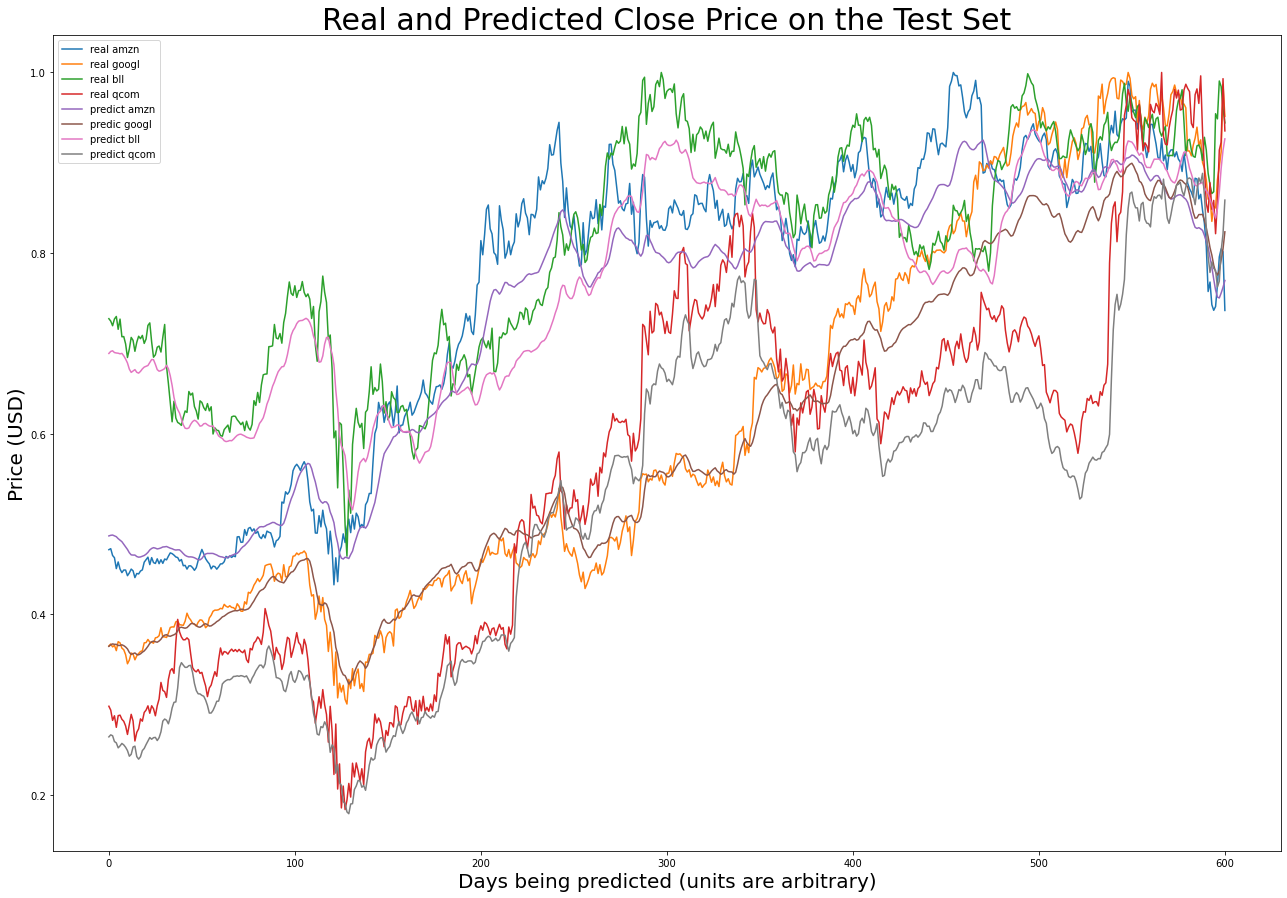

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model4.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

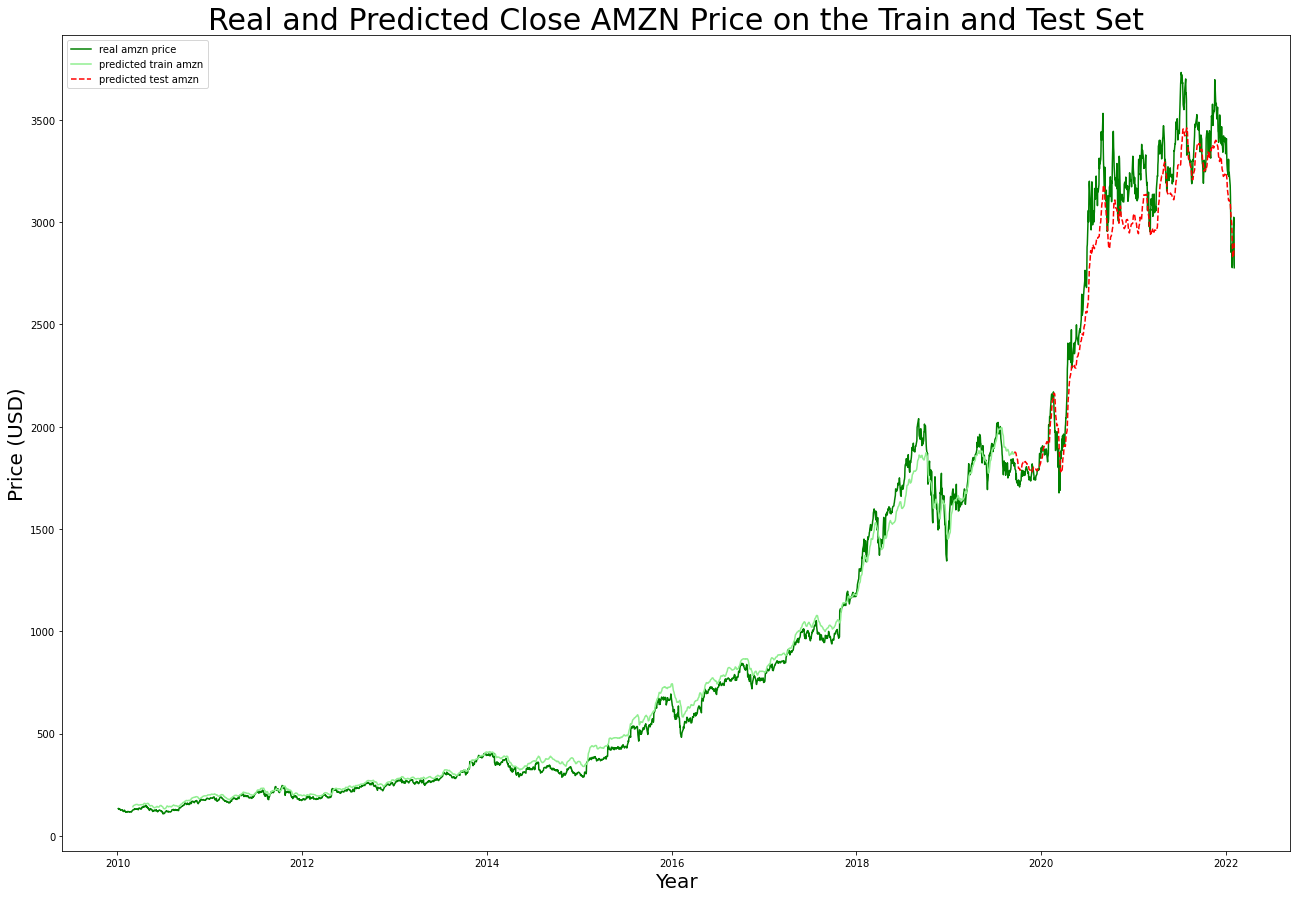

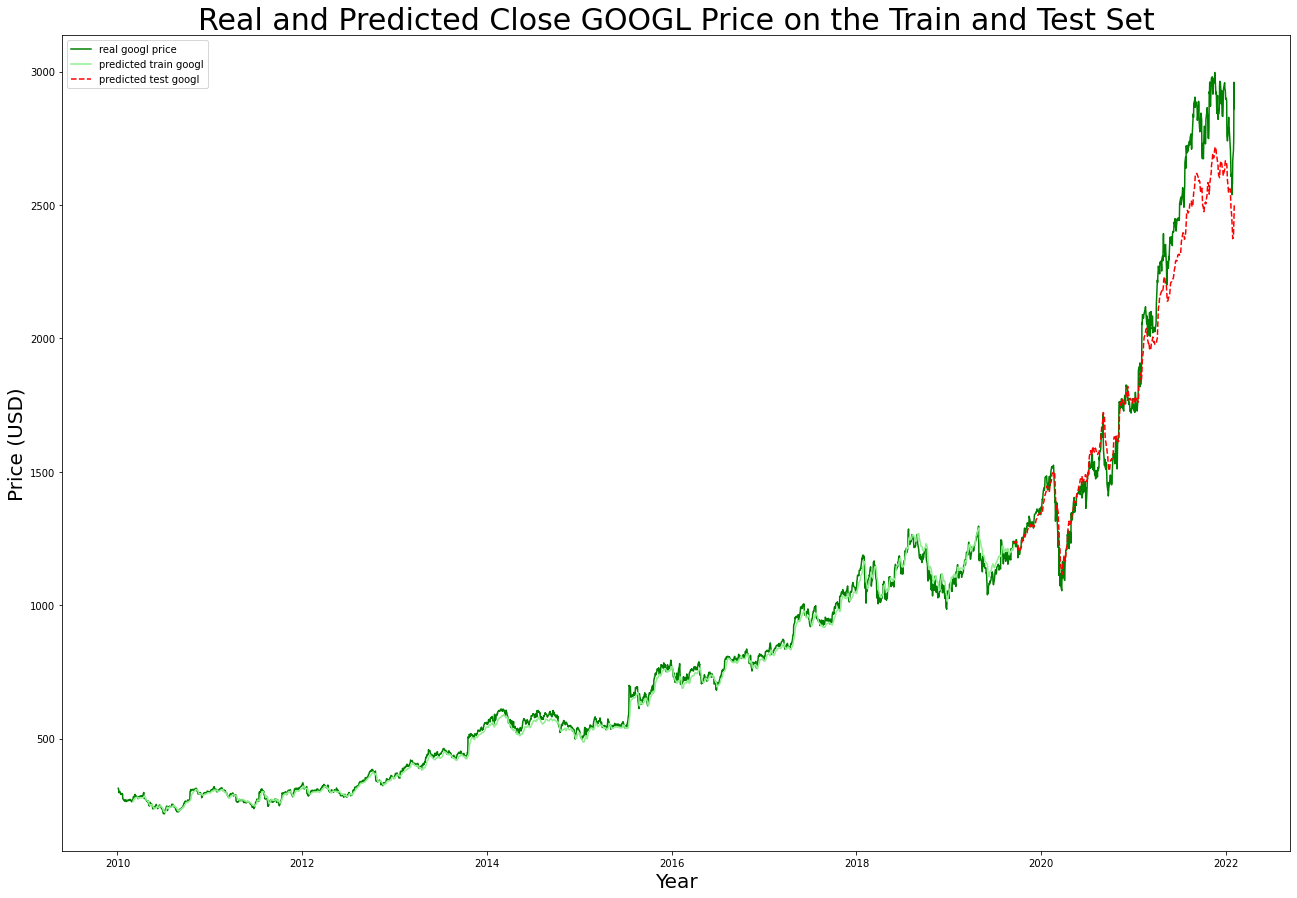

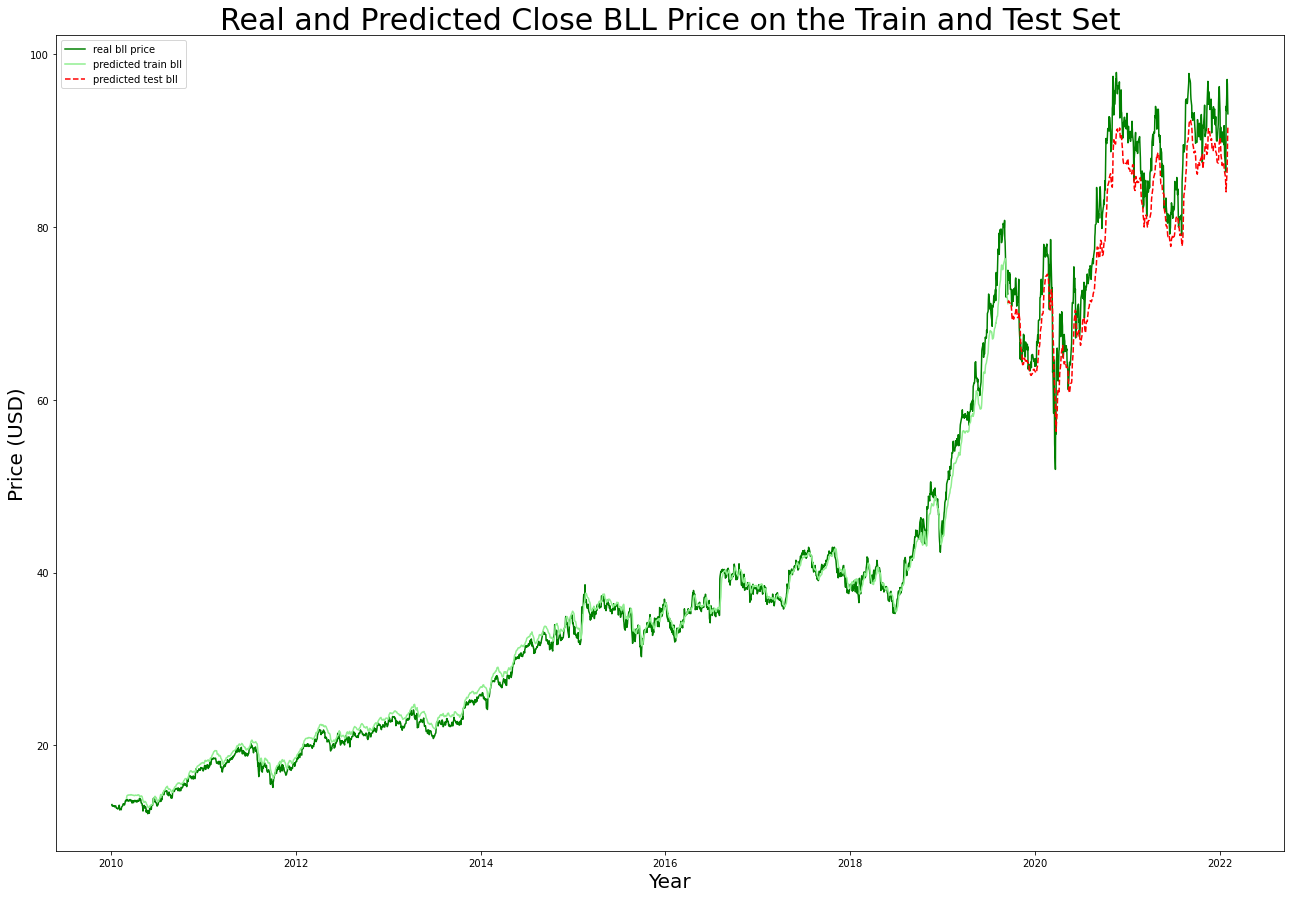

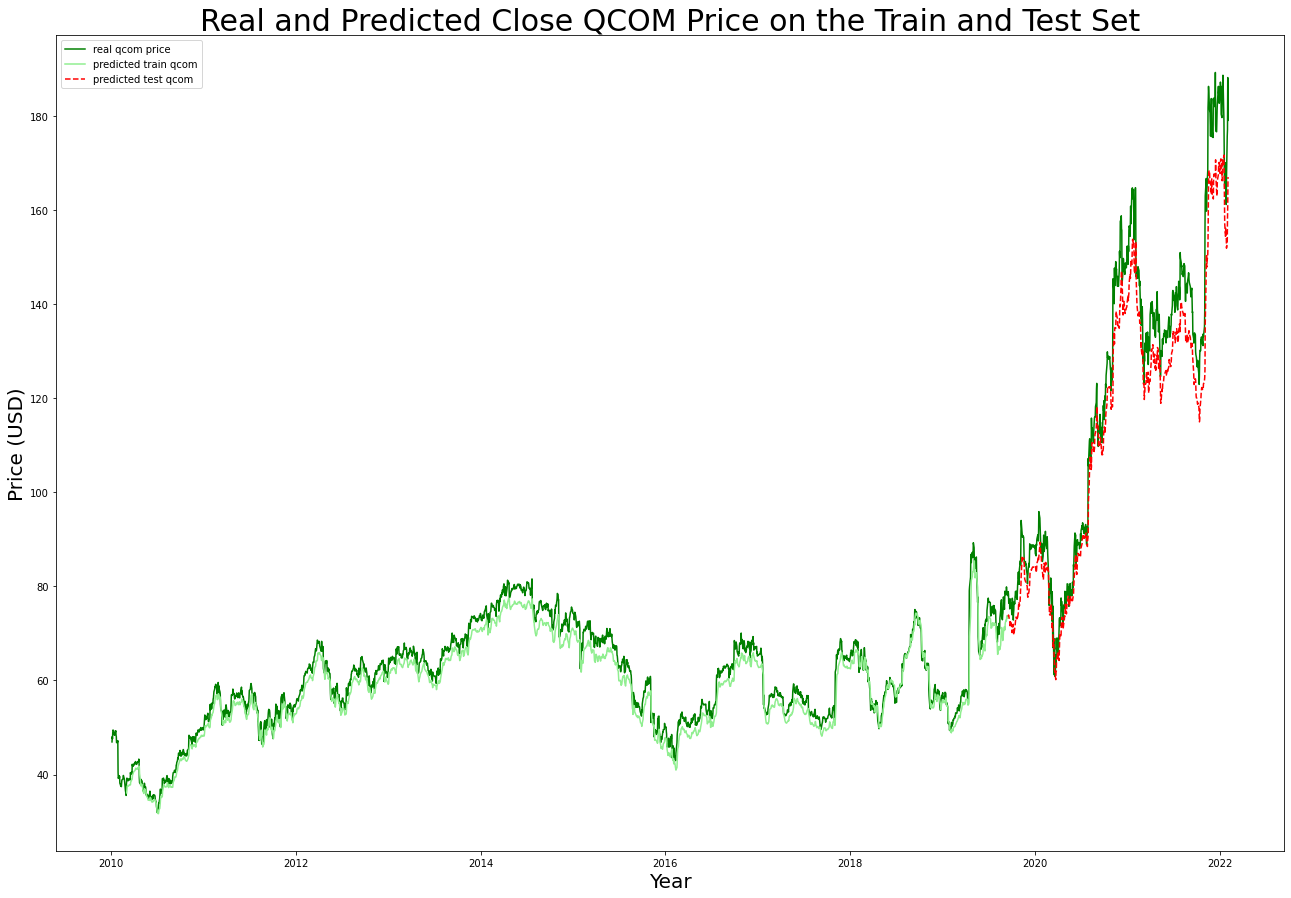

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model4.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model4.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

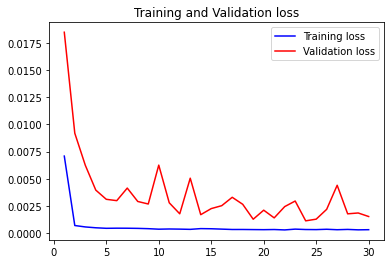

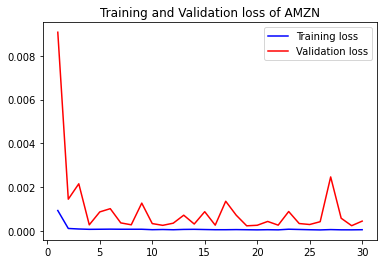

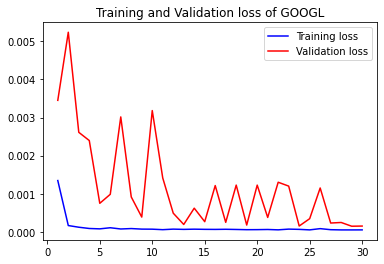

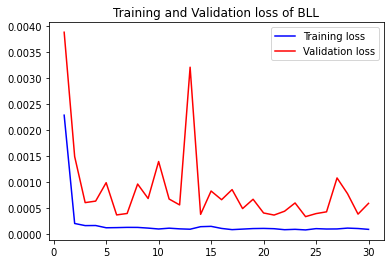

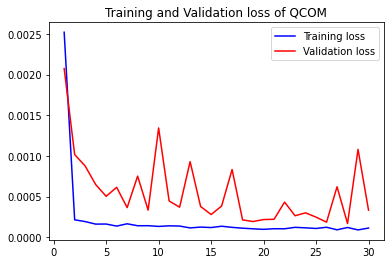

In [ ]:
# visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 35.23852528585179 
MAE Test: 133.4499276108829 
MSE Train: 2144.292591214971 
MSE Test: 26791.982874478905 
RMSE Train1: 46.30650700727675 
RMSE Test1: 163.6825674116792 
MAPE Train: 7.256721217044734 
MAPE Test: 4.519380018155746


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 15.493214988629122 
MAE Test: 102.66935275517366 
MSE Train: 456.66355029722564 
MSE Test: 20089.872754670123 
RMSE Train1: 21.369687650904627 
RMSE Test1: 141.73874824715406 
MAPE Train: 2.4159582010726903 
MAPE Test: 4.555202178459713


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 0.8578920475502982 
MAE Test: 3.609790738529453 
MSE Train: 1.3924812659730599 
MSE Test: 16.928658688995757 
RMSE Train1: 1.1800344342319253 
RMSE Test1: 4.114445125286733 
MAPE Train: 2.8455213100487113 
MAPE Test: 4.371719626898749


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 2.322832086906798 
MAE Test: 7.3992242860714725 
MSE Train: 7.2322891728553715 
MSE Test: 77.02192402812314 
RMSE Train1: 2.6892915745332213 
RMSE Test1: 8.776213535923288 
MAPE Train: 3.7720837623866235 
MAPE Test: 5.794666049413146


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name15 = 'TestPredNormData4.xlsx'
file_name16 = 'TrainPredNormData4.xlsx'
file_name17 = 'TestPredData4.xlsx'
file_name18 = 'TrainPredData4.xlsx'

df_pred_test_norm.to_excel(file_name15)
df_pred_train_norm.to_excel(file_name16)
df_pred_test.to_excel(file_name17)
df_pred_train.to_excel(file_name18)

# **Model3**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = GRU(160, return_sequences=True, name='gru1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = GRU(160, return_sequences=True, name='gru2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = GRU(160, return_sequences=True, name='gru1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = GRU(160, return_sequences=True, name='gru2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = GRU(160, return_sequences=True, name='gru1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = GRU(160, return_sequences=True, name='gru2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = GRU(160, return_sequences=True, name='gru1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = GRU(160, return_sequences=True, name='gru2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = GRU(160, return_sequences=True, name='gru_conc')(conc)
conc = Dropout(0.5)(conc)

output1 = GRU(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = GRU(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = GRU(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = GRU(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model5 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model5.compile(optimizer=adam, loss='mse')
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

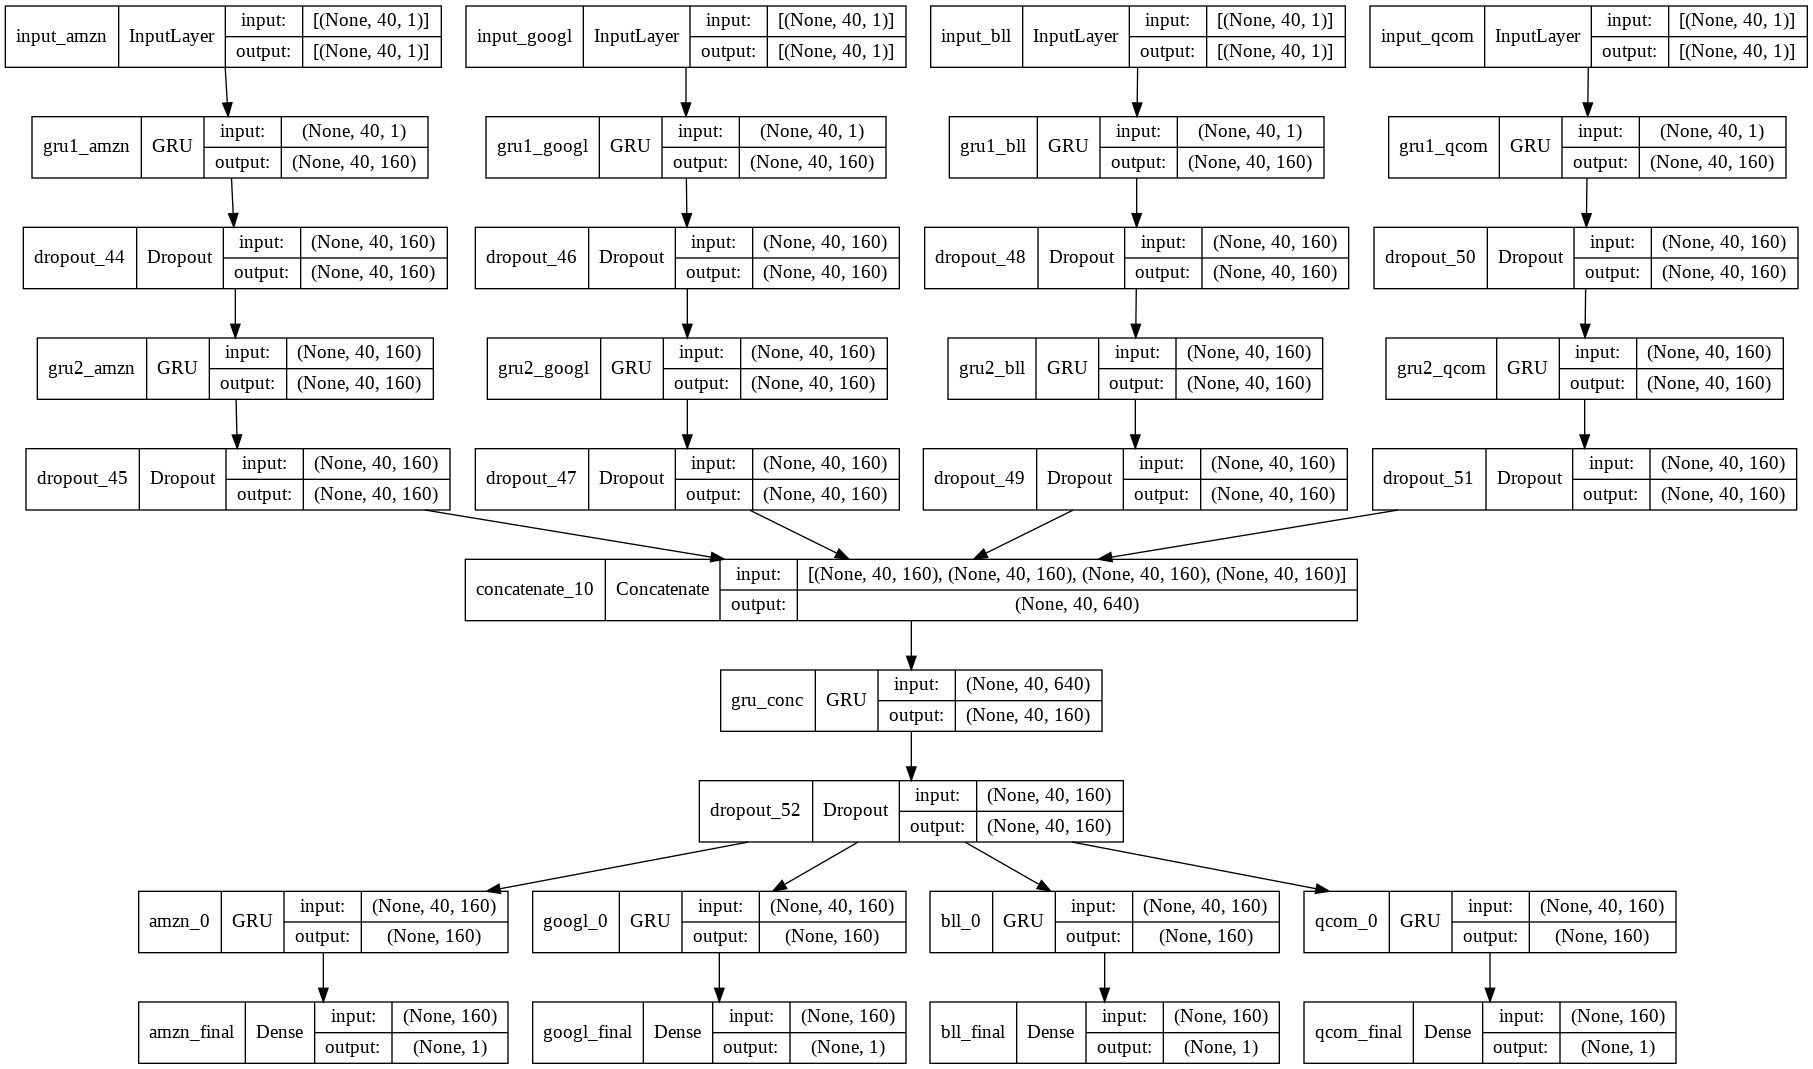

In [ ]:
# Displaying the structure of the final model
plot_model(model5, show_shapes=True)

In [ ]:
# Fitting Model
history = model5.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model5.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 121s 1s/step - loss: 0.0070 - amzn_final_loss: 0.0011 - googl_final_loss: 0.0012 - bll_final_loss: 0.0025 - qcom_final_loss: 0.0022 - val_loss: 0.0238 - val_amzn_final_loss: 0.0061 - val_googl_final_loss: 0.0087 - val_bll_final_loss: 0.0082 - val_qcom_final_loss: 8.6534e-04
Epoch 2/30
61/61 [==============================] - 59s 964ms/step - loss: 0.0011 - amzn_final_loss: 1.8387e-04 - googl_final_loss: 2.0472e-04 - bll_final_loss: 3.5066e-04 - qcom_final_loss: 3.6775e-04 - val_loss: 0.0156 - val_amzn_final_loss: 0.0070 - val_googl_final_loss: 0.0048 - val_bll_final_loss: 0.0022 - val_qcom_final_loss: 0.0015
Epoch 3/30
61/61 [==============================] - 46s 762ms/step - loss: 7.7970e-04 - amzn_final_loss: 1.4193e-04 - googl_final_loss: 1.6907e-04 - bll_final_loss: 2.4093e-04 - qcom_final_loss: 2.2777e-04 - val_loss: 0.0081 - val_amzn_final_loss: 0.0021 - val_googl_final_loss: 0.0040 - val_bll_final_loss: 0.0013 - val_qcom_final_

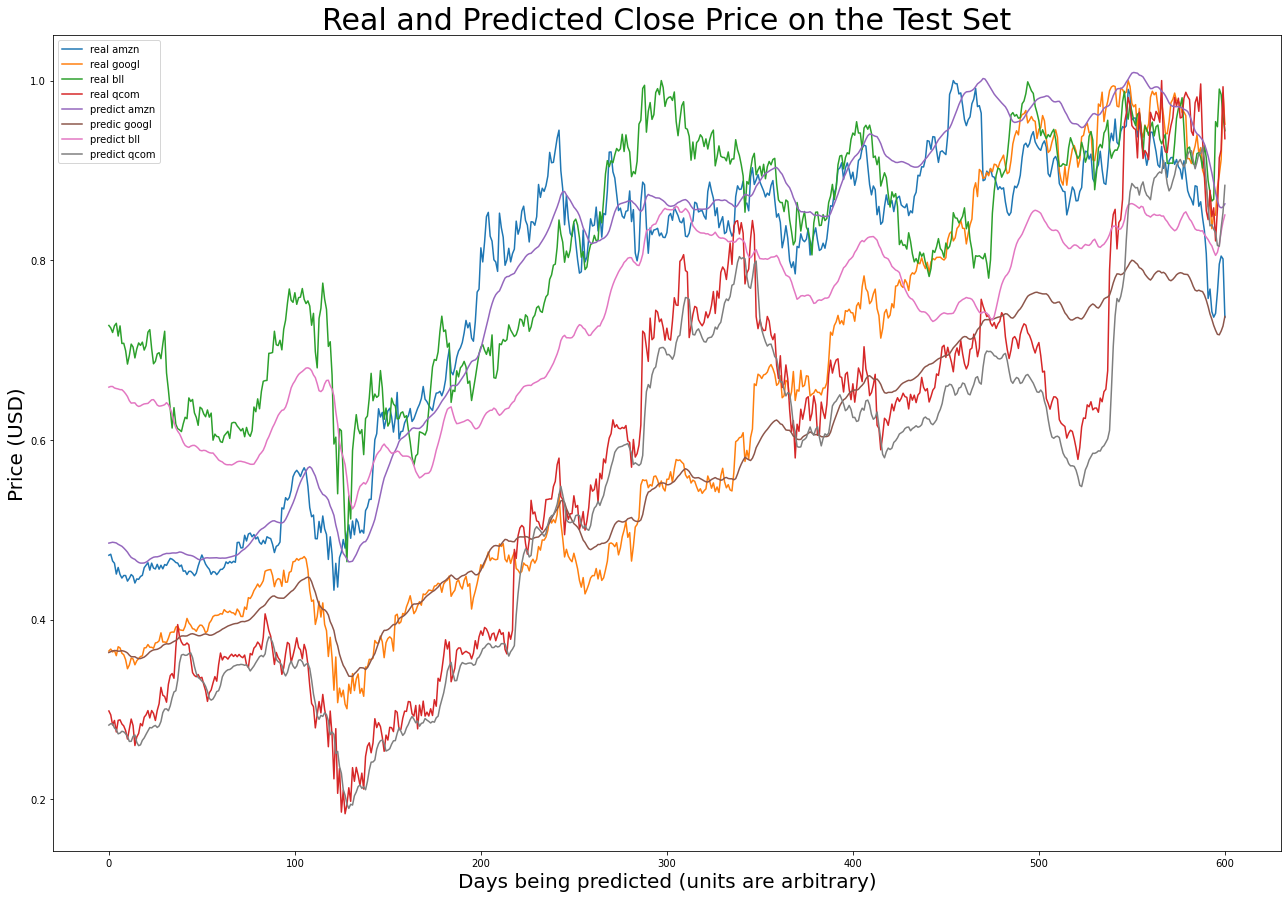

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model5.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

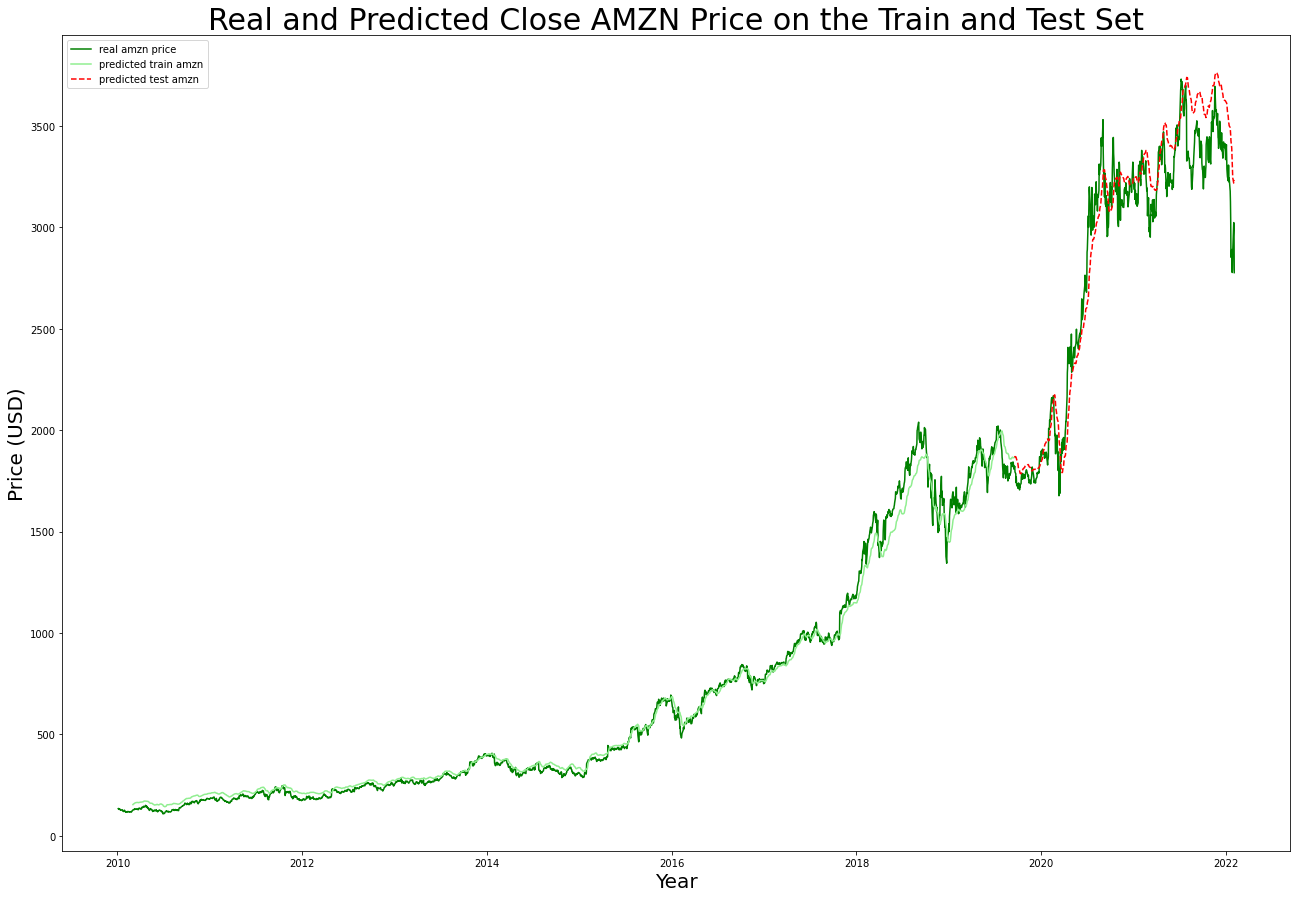

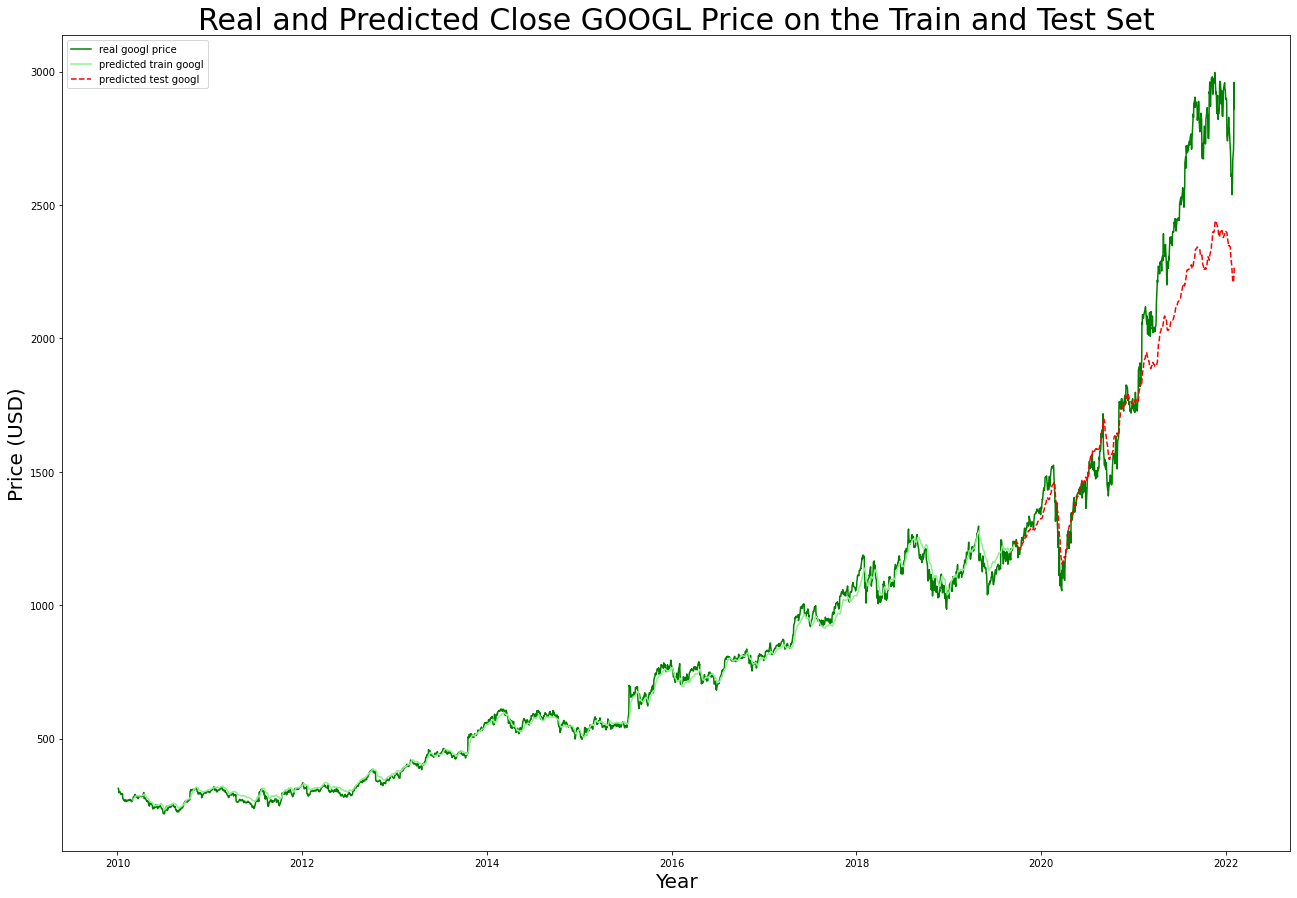

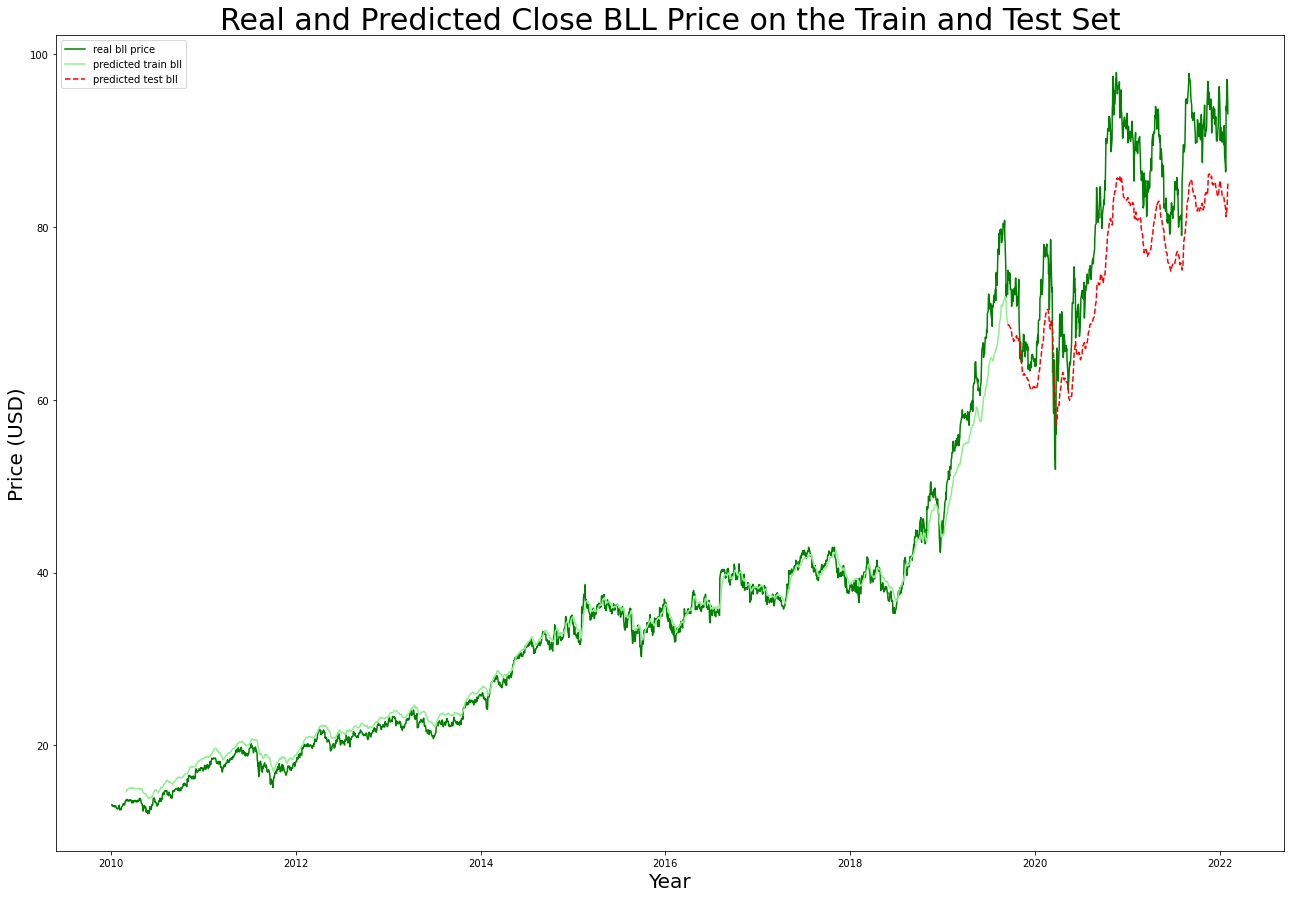

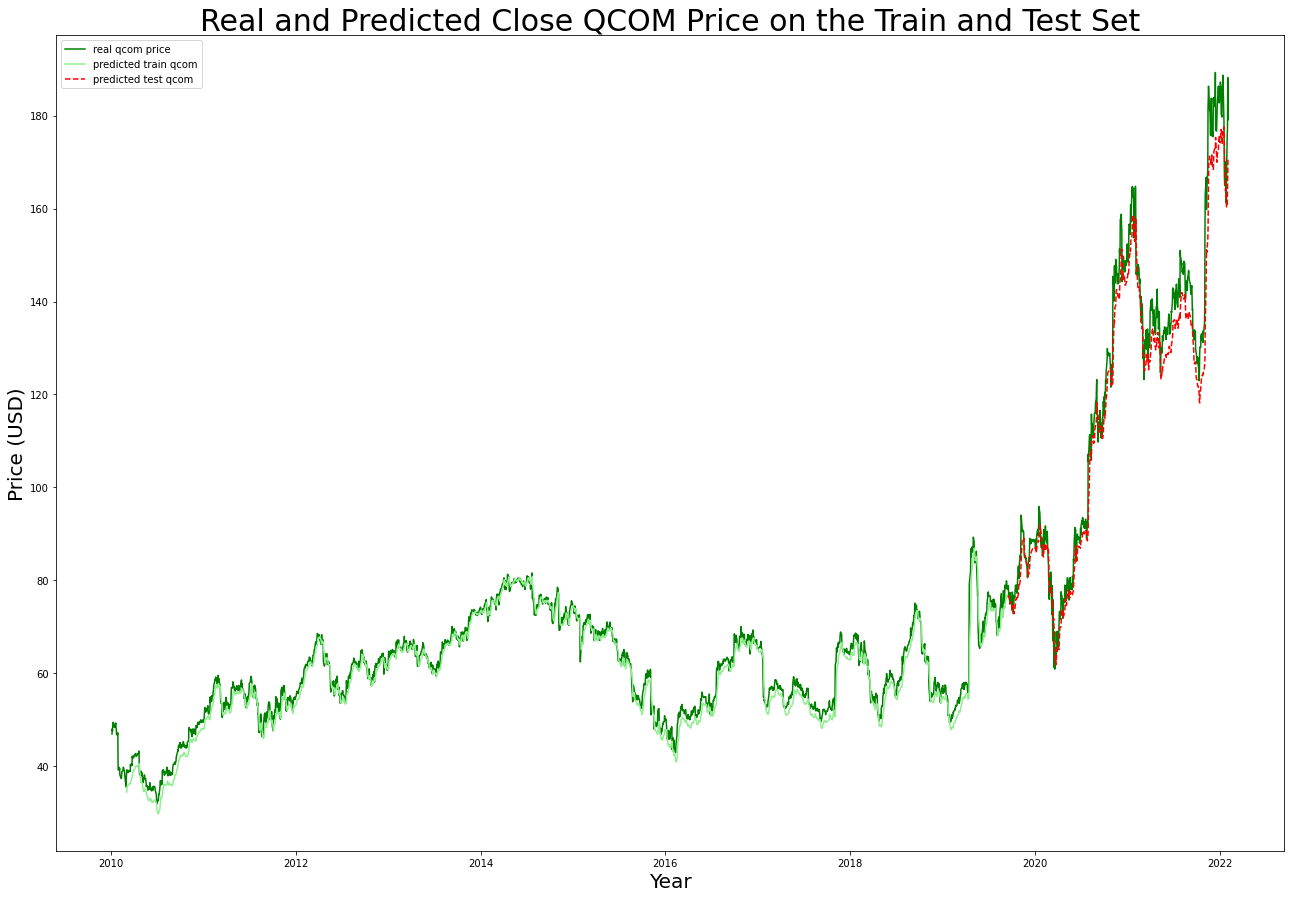

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model5.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model5.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

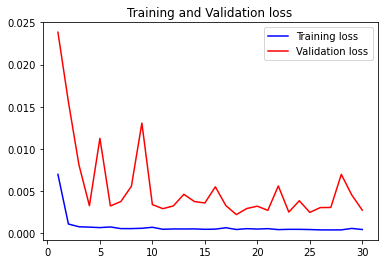

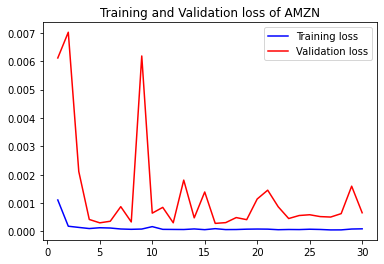

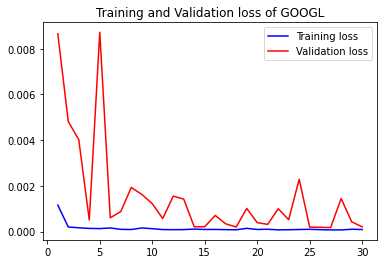

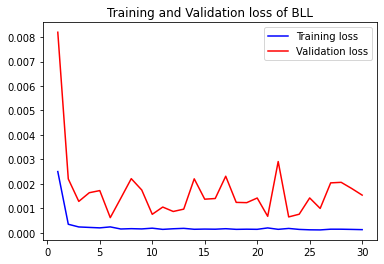

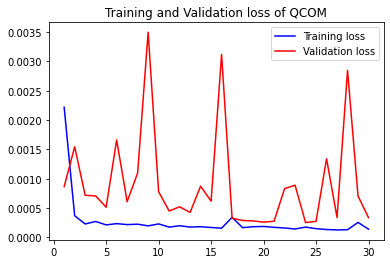

In [ ]:
# Visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 31.592597396285445 
MAE Test: 140.1988046046303 
MSE Train: 2149.420562440421 
MSE Test: 31181.048929270586 
RMSE Train1: 46.361843820542994 
RMSE Test1: 176.5815645226607 
MAPE Train: 7.08071656654886 
MAPE Test: 4.8370783487956786


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 17.07626003054247 
MAE Test: 186.40233217261596 
MSE Train: 563.0287431816089 
MSE Test: 71963.06705455185 
RMSE Train1: 23.728226718016852 
RMSE Test1: 268.25932799168766 
MAPE Train: 2.873419724550188 
MAPE Test: 7.86493414416636


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.143724146655238 
MAE Test: 7.137583499343542 
MSE Train: 3.0239942947974376 
MSE Test: 59.48204045192683 
RMSE Train1: 1.7389635691403766 
RMSE Test1: 7.7124600778173775 
MAPE Train: 3.8866542795257817 
MAPE Test: 8.54494821052156


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.638898932035893 
MAE Test: 4.911427426457207 
MSE Train: 4.398615835649944 
MSE Test: 39.85746804426333 
RMSE Train1: 2.0972877331567896 
RMSE Test1: 6.313277123987456 
MAPE Train: 2.9071771357862723 
MAPE Test: 3.858279399638144


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name19 = 'TestPredNormData5.xlsx'
file_name20 = 'TrainPredNormData5.xlsx'
file_name21 = 'TestPredData5.xlsx'
file_name22 = 'TrainPredData5.xlsx'

df_pred_test_norm.to_excel(file_name19)
df_pred_train_norm.to_excel(file_name20)
df_pred_test.to_excel(file_name21)
df_pred_train.to_excel(file_name22)

# **Model4**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = GRU(160, return_sequences=True, name='gru1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = GRU(160, return_sequences=True, name='gru2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = GRU(160, return_sequences=True, name='gru1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = GRU(160, return_sequences=True, name='gru2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = GRU(160, return_sequences=True, name='gru1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = GRU(160, return_sequences=True, name='gru2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = GRU(160, return_sequences=True, name='gru1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = GRU(160, return_sequences=True, name='gru2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = GRU(160, return_sequences=True, name='gru_conc1')(conc)
conc = GRU(160, return_sequences=True, name='gru_conc2')(conc)

output1 = GRU(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = GRU(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = GRU(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = GRU(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model6 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model6.compile(optimizer=adam, loss='mse')
model6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

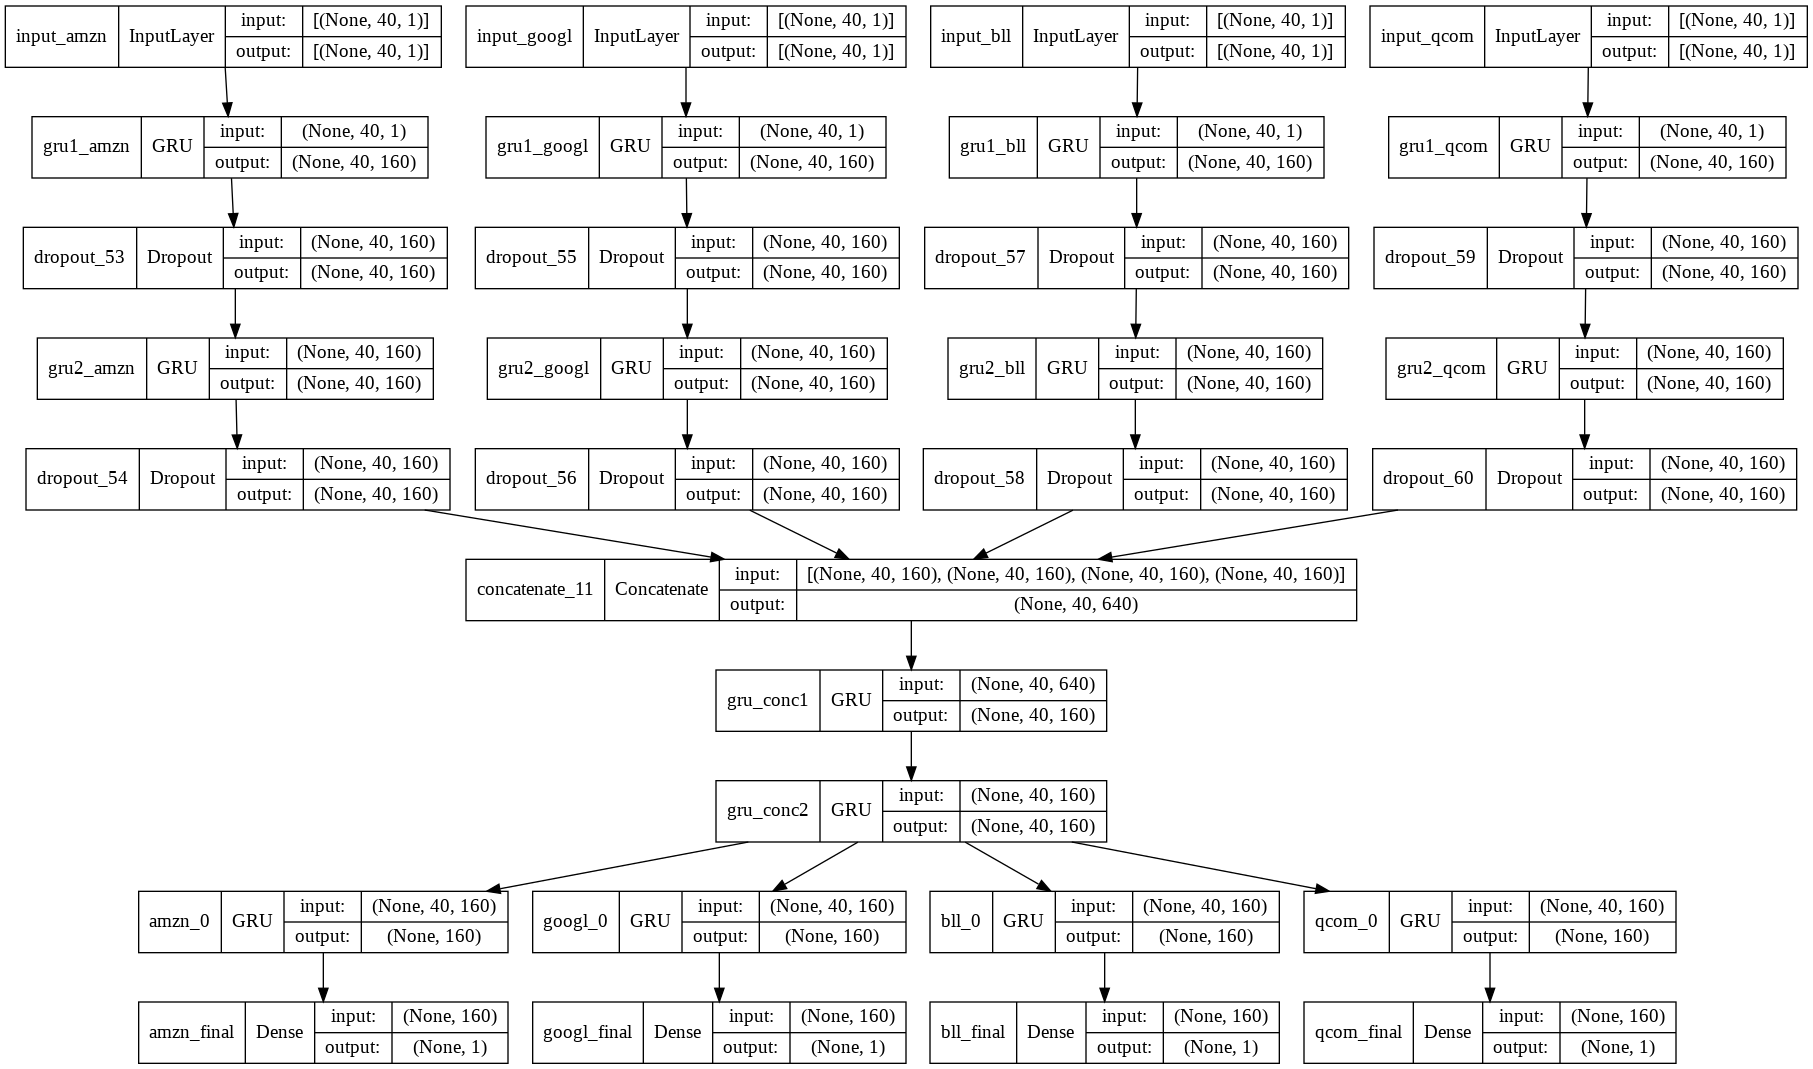

In [ ]:
# Displaying the structure of the final model
plot_model(model6, show_shapes=True)

In [ ]:
# Fitting Model
history = model6.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model6.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 77s 885ms/step - loss: 0.0111 - amzn_final_loss: 0.0016 - googl_final_loss: 0.0019 - bll_final_loss: 0.0035 - qcom_final_loss: 0.0041 - val_loss: 0.0185 - val_amzn_final_loss: 0.0076 - val_googl_final_loss: 0.0021 - val_bll_final_loss: 0.0079 - val_qcom_final_loss: 8.5725e-04
Epoch 2/30
61/61 [==============================] - 49s 804ms/step - loss: 7.0374e-04 - amzn_final_loss: 1.0353e-04 - googl_final_loss: 1.4338e-04 - bll_final_loss: 2.2162e-04 - qcom_final_loss: 2.3521e-04 - val_loss: 0.0110 - val_amzn_final_loss: 0.0025 - val_googl_final_loss: 0.0039 - val_bll_final_loss: 0.0035 - val_qcom_final_loss: 0.0011
Epoch 3/30
61/61 [==============================] - 49s 809ms/step - loss: 5.8590e-04 - amzn_final_loss: 7.9476e-05 - googl_final_loss: 1.1091e-04 - bll_final_loss: 1.7977e-04 - qcom_final_loss: 2.1574e-04 - val_loss: 0.0071 - val_amzn_final_loss: 0.0020 - val_googl_final_loss: 0.0018 - val_bll_final_loss: 0.0027 - val_qcom_

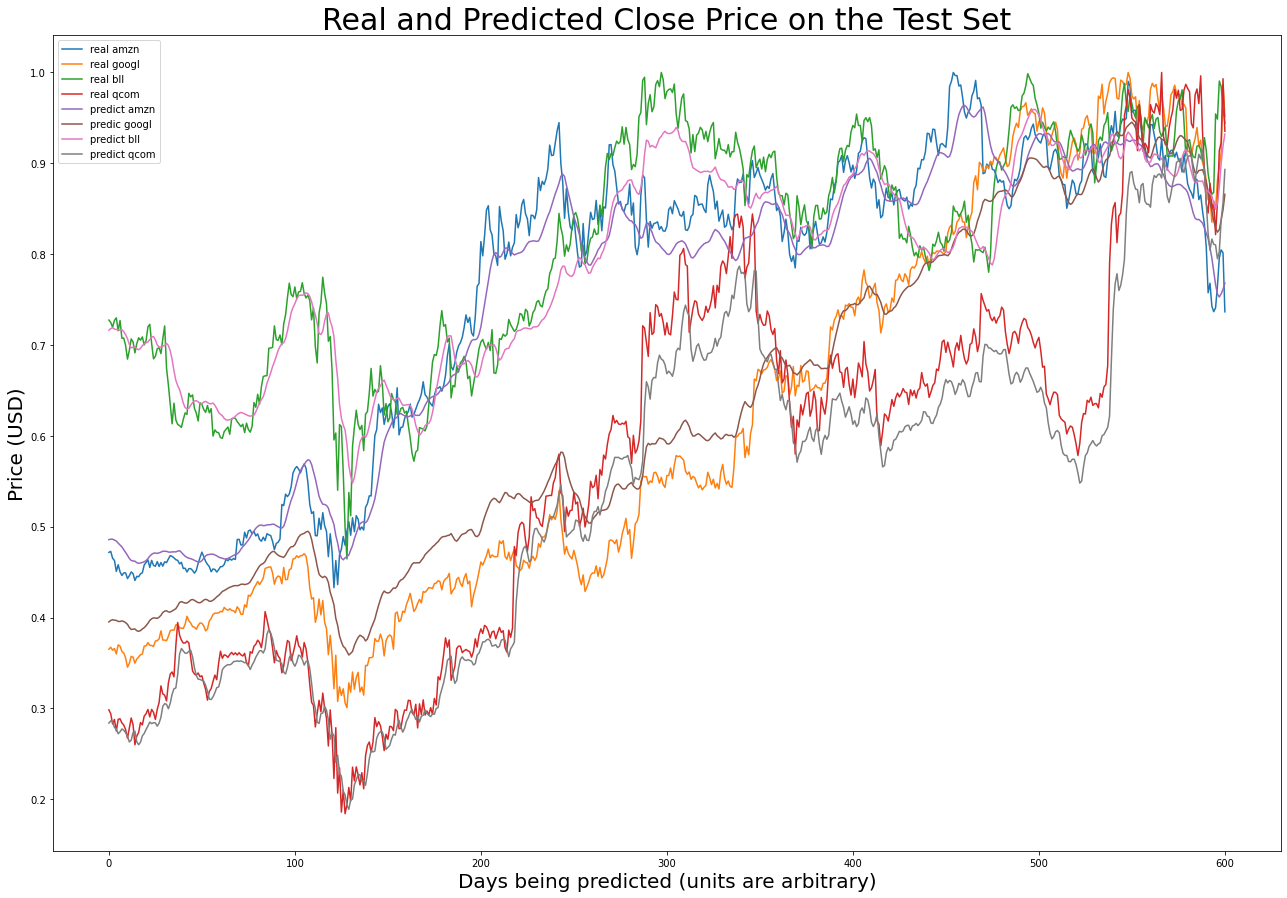

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model6.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

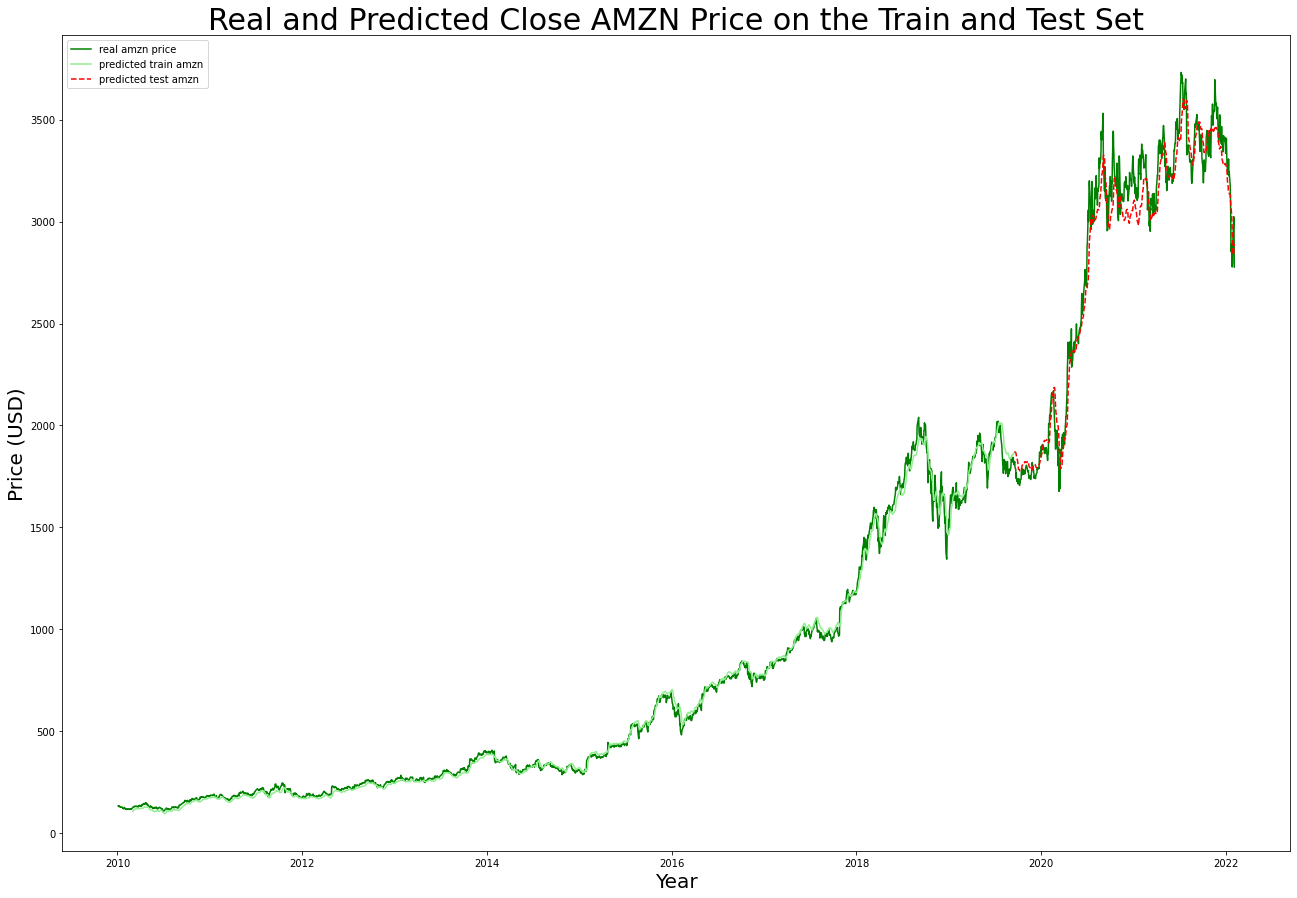

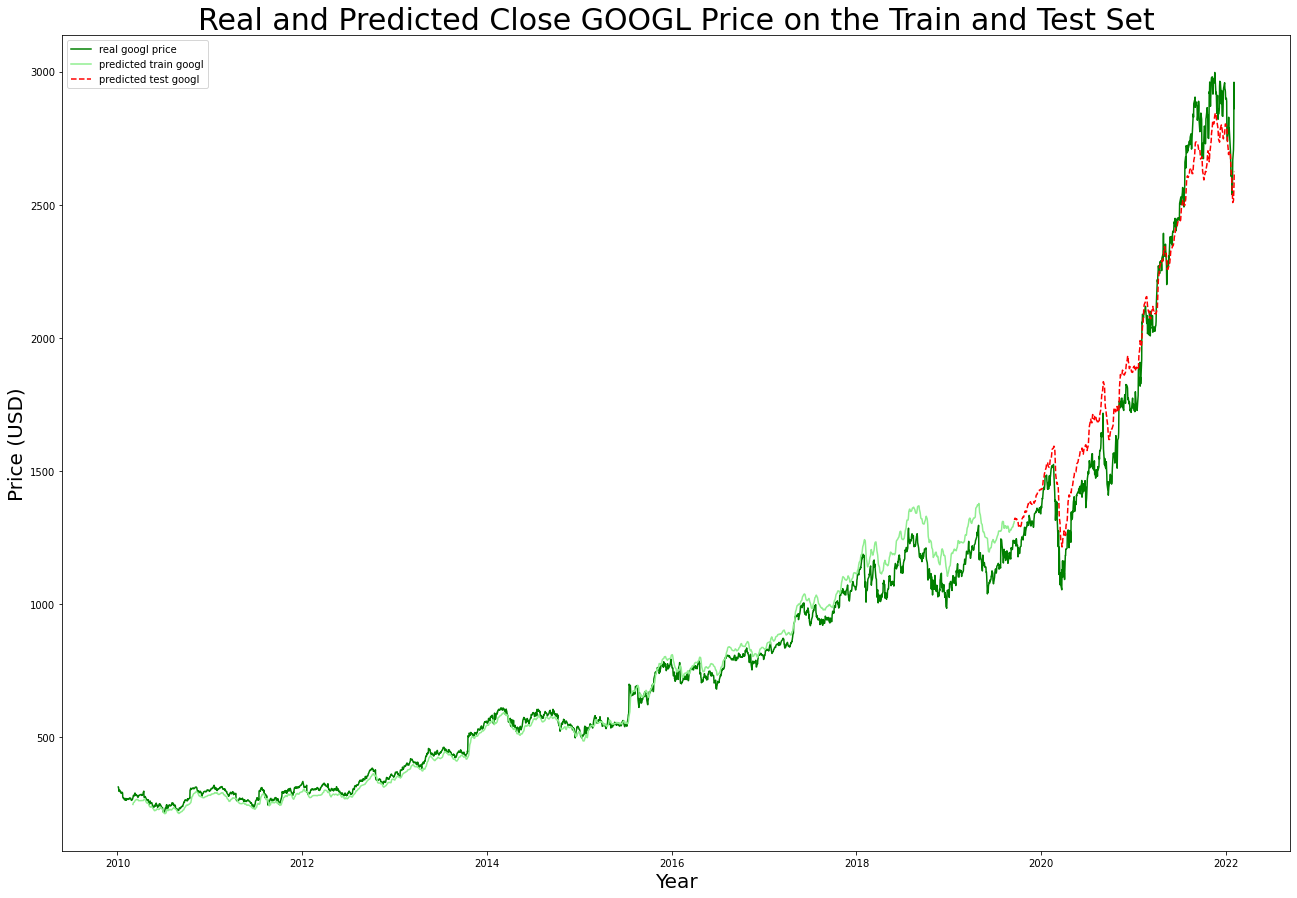

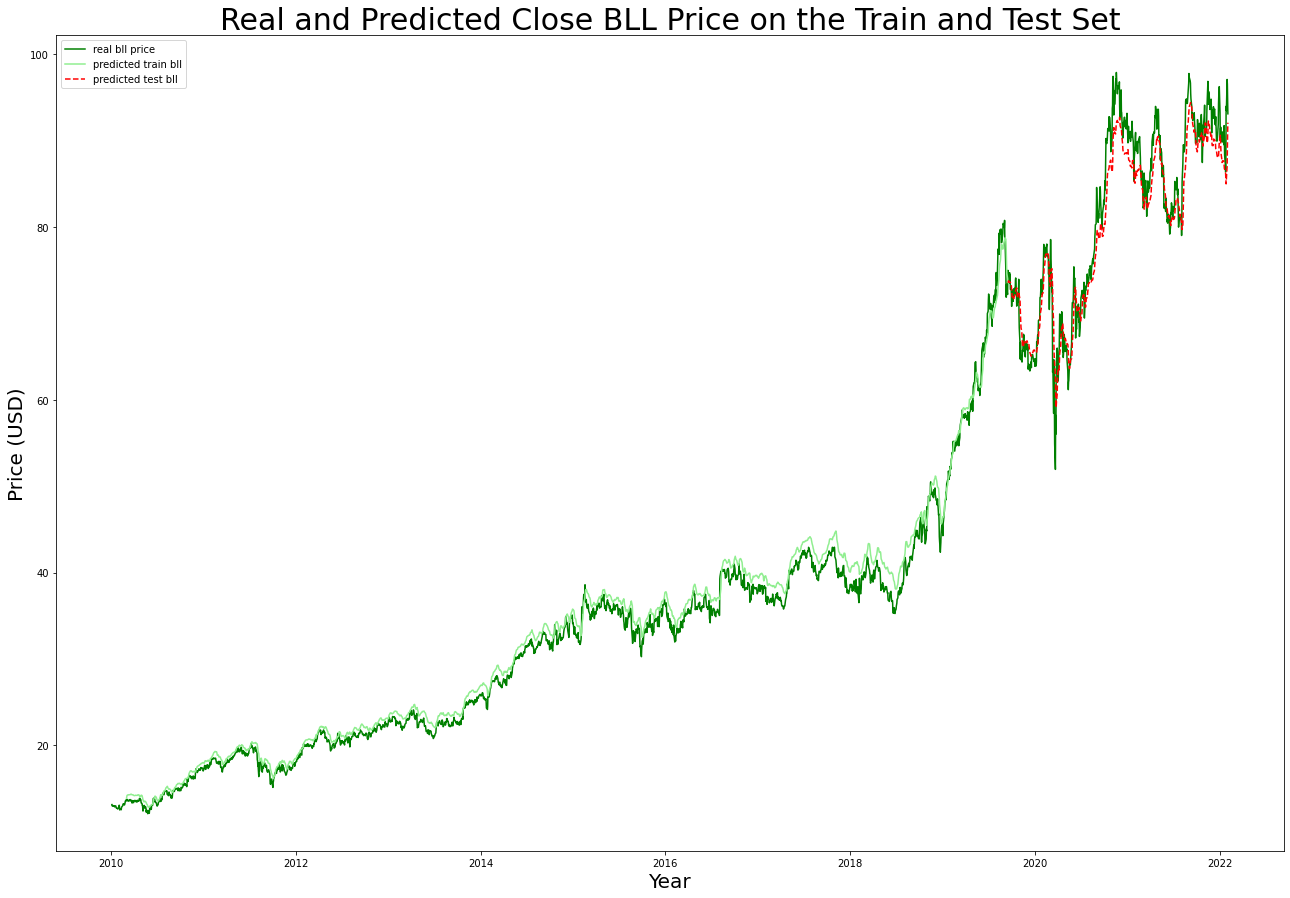

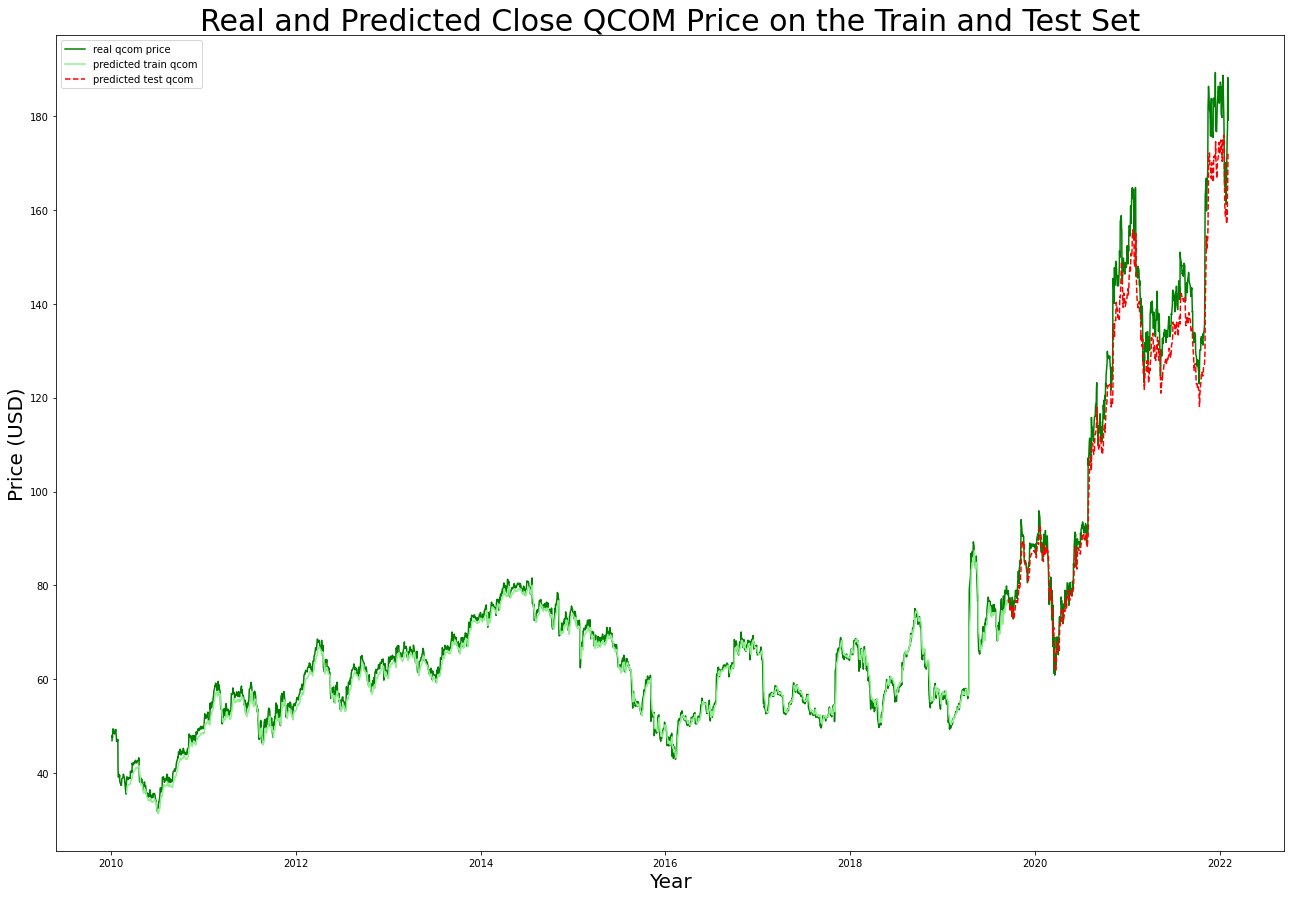

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model6.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model6.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

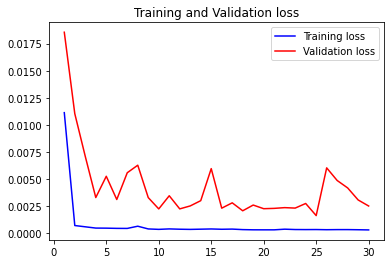

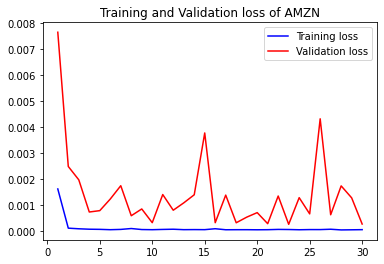

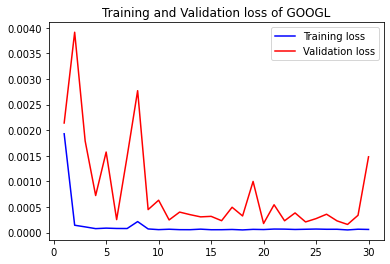

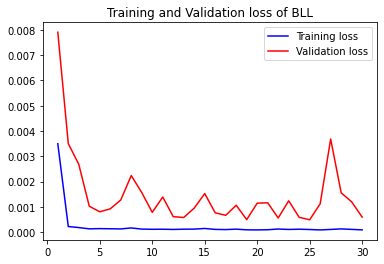

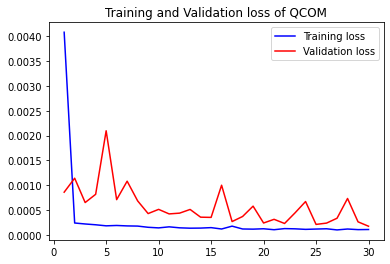

In [ ]:
# Visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 20.613907088947652 
MAE Test: 90.20518008722442 
MSE Train: 954.9245117137201 
MSE Test: 13081.987552953937 
RMSE Train1: 30.901852884798352 
RMSE Test1: 114.37651661488007 
MAPE Train: 4.2531668468741906 
MAPE Test: 3.149739386897631


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 36.7612275858993 
MAE Test: 105.43917303355086 
MSE Train: 2798.5044757600394 
MSE Test: 14817.538622962085 
RMSE Train1: 52.90089295805922 
RMSE Test1: 121.72731255951594 
MAPE Train: 5.321970385974115 
MAPE Test: 6.134455914249314


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.1566470460101956 
MAE Test: 2.340702418678017 
MSE Train: 1.9509040411570746 
MSE Test: 8.92589929100325 
RMSE Train1: 1.3967476655276982 
RMSE Test1: 2.987624355738728 
MAPE Train: 3.755323810080915 
MAPE Test: 2.851934420298506


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.2091249941390503 
MAE Test: 5.475289209908534 
MSE Train: 2.6127276003797872 
MSE Test: 46.949678577908486 
RMSE Train1: 1.6163933928285488 
RMSE Test1: 6.851983550615725 
MAPE Train: 2.050549536825772 
MAPE Test: 4.180388217165914


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name23 = 'TestPredNormData6.xlsx'
file_name24 = 'TrainPredNormData6.xlsx'
file_name25 = 'TestPredData6.xlsx'
file_name26 = 'TrainPredData6.xlsx'

df_pred_test_norm.to_excel(file_name23)
df_pred_train_norm.to_excel(file_name24)
df_pred_test.to_excel(file_name25)
df_pred_train.to_excel(file_name26)

# **Accuracy MAPE (Mean Absolute Percentage Error), RMSPE (Roor Mean Square Percentage Error) and RMDPE (Root Mean Dimention Percentage Error) GRU**

In [ ]:
# access data excel from drive
path_gru = '/content/GRU.xlsx'
df_gru = pd.ExcelFile(path_gru)

In [ ]:
# Read data excel
df0_gru = pd.read_excel(path_gru, 'Data Asli')
df3_gru = pd.read_excel(path_gru, 'Model3')
df4_gru = pd.read_excel(path_gru, 'Model4')
df5_gru = pd.read_excel(path_gru, 'Model5')
df6_gru = pd.read_excel(path_gru, 'Model6')

In [ ]:
# drop unused data column
df0_gru.drop(['Date'],axis=1,inplace=True)
df3_gru.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df4_gru.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df5_gru.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df6_gru.drop(['Date','Unnamed: 5'],axis=1,inplace=True)

In [ ]:
df0_gru

AMZN        GOOGL        BLL        QCOM
0      133.899994   313.688690  13.122500   46.939999
1      134.690002   312.307312  12.975000   48.070000
2      132.250000   304.434448  13.000000   47.599998
3      130.000000   297.347351  12.970000   48.980000
4      133.520004   301.311310  13.017500   49.470001
...           ...          ...        ...         ...
3039  2879.560059  2667.020020  93.500000  166.809998
3040  2991.469971  2706.070068  97.099998  175.759995
3041  3023.870117  2752.879883  96.570000  177.130005
3042  3012.250000  2960.000000  94.459999  188.199997
3043  2776.909912  2861.800049  93.120003  179.100006

[3044 rows x 4 columns]

In [ ]:
# Get data test
unscaled_data_gru = df0_gru.to_numpy()[2443:][0:len(df0_gru)-2443, :]
unscaled_df3_gru = df3_gru.to_numpy()[2403:][0:len(df3_gru)-2403, :]
unscaled_df4_gru = df4_gru.to_numpy()[2403:][0:len(df4_gru)-2403, :]
unscaled_df5_gru = df5_gru.to_numpy()[2403:][0:len(df5_gru)-2403, :]
unscaled_df6_gru = df6_gru.to_numpy()[2403:][0:len(df6_gru)-2403, :]

In [ ]:
unscaled_data_gru

array([[1817.45996094, 1232.65002441,   74.51000214,   78.90000153],
       [1821.5       , 1238.75      ,   74.27999878,   78.23000336],
       [1794.16003418, 1229.83996582,   73.83999634,   76.44000244],
       ...,
       [3023.87011719, 2752.87988281,   96.56999969,  177.13000488],
       [3012.25      , 2960.        ,   94.45999908,  188.19999695],
       [2776.90991211, 2861.80004883,   93.12000275,  179.1000061 ]])

In [ ]:
unscaled_data_gru.shape

(601, 4)

In [ ]:
amzn = 0
googl = 1
bll = 2
qcom = 3

# Calculate MAPE (Mean Absolute Percentage Error), RMSPE (Roor Mean Square Percentage Error) and RMDPE (Root Mean Dimention Percentage Error) for each company

#AMZN
# MAPE
mape_amzn_model3_gru = np.mean(np.abs((unscaled_data_gru[:,amzn] - unscaled_df3_gru[:,amzn])/unscaled_data_gru[:,amzn]))*100
accuracy_mape_amzn_model3_gru = 100-mape_amzn_model3_gru
mape_amzn_model4_gru = np.mean(np.abs((unscaled_data_gru[:,amzn] - unscaled_df4_gru[:,amzn])/unscaled_data_gru[:,amzn]))*100
accuracy_mape_amzn_model4_gru = 100-mape_amzn_model4_gru
mape_amzn_model5_gru = np.mean(np.abs((unscaled_data_gru[:,amzn] - unscaled_df5_gru[:,amzn])/unscaled_data_gru[:,amzn]))*100
accuracy_mape_amzn_model5_gru = 100-mape_amzn_model5_gru
mape_amzn_model6_gru = np.mean(np.abs((unscaled_data_gru[:,amzn] - unscaled_df6_gru[:,amzn])/unscaled_data_gru[:,amzn]))*100
accuracy_mape_amzn_model6_gru = 100-mape_amzn_model6_gru

amzn_model3_gru = ((unscaled_df3_gru[:,amzn] - unscaled_data_gru[:,amzn])/unscaled_data_gru[:,amzn])
amzn_model4_gru = ((unscaled_df4_gru[:,amzn] - unscaled_data_gru[:,amzn])/unscaled_data_gru[:,amzn])
amzn_model5_gru = ((unscaled_df5_gru[:,amzn] - unscaled_data_gru[:,amzn])/unscaled_data_gru[:,amzn])
amzn_model6_gru = ((unscaled_df6_gru[:,amzn] - unscaled_data_gru[:,amzn])/unscaled_data_gru[:,amzn])

# RMSPE
rmspe_amzn_model3_gru = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model3_gru[i] = math.pow(amzn_model3_gru[i],2)
rmspe_amzn_model3_gru = math.sqrt(np.mean(rmspe_amzn_model3_gru))*100
accuracy_rmspe_amzn_model3_gru = 100-rmspe_amzn_model3_gru
rmspe_amzn_model4_gru = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model4_gru[i] = math.pow(amzn_model4_gru[i],2)
rmspe_amzn_model4_gru = math.sqrt(np.mean(rmspe_amzn_model4_gru))*100
accuracy_rmspe_amzn_model4_gru = 100-rmspe_amzn_model4_gru
rmspe_amzn_model5_gru = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model5_gru[i] = math.pow(amzn_model5_gru[i],2)
rmspe_amzn_model5_gru = math.sqrt(np.mean(rmspe_amzn_model5_gru))*100
accuracy_rmspe_amzn_model5_gru = 100-rmspe_amzn_model5_gru
rmspe_amzn_model6_gru = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model6_gru[i] = math.pow(amzn_model6_gru[i],2)
rmspe_amzn_model6_gru = math.sqrt(np.mean(rmspe_amzn_model6_gru))*100
accuracy_rmspe_amzn_model6_gru = 100-rmspe_amzn_model6_gru

# RMDPE
rmdpe_amzn_model3_gru = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model3_gru[i] = math.pow(amzn_model3_gru[i],40)
rmdpe_amzn_model3_gru = math.pow(np.mean(rmdpe_amzn_model3_gru),1/40)*100
accuracy_rmdpe_amzn_model3_gru = 100-rmdpe_amzn_model3_gru
rmdpe_amzn_model4_gru = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model4_gru[i] = math.pow(amzn_model4_gru[i],40)
rmdpe_amzn_model4_gru = math.pow(np.mean(rmdpe_amzn_model4_gru),1/40)*100
accuracy_rmdpe_amzn_model4_gru = 100-rmdpe_amzn_model4_gru
rmdpe_amzn_model5_gru = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model5_gru[i] = math.pow(amzn_model5_gru[i],40)
rmdpe_amzn_model5_gru = math.pow(np.mean(rmdpe_amzn_model5_gru),1/40)*100
accuracy_rmdpe_amzn_model5_gru = 100-rmdpe_amzn_model5_gru
rmdpe_amzn_model6_gru = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model6_gru[i] = math.pow(amzn_model6_gru[i],40)
rmdpe_amzn_model6_gru = math.pow(np.mean(rmdpe_amzn_model6_gru),1/40)*100
accuracy_rmdpe_amzn_model6_gru = 100-rmdpe_amzn_model6_gru

#GOOGL
# MAPE
mape_googl_model3_gru = np.mean(np.abs((unscaled_data_gru[:,googl] - unscaled_df3_gru[:,googl])/unscaled_data_gru[:,googl]))*100
accuracy_mape_googl_model3_gru = 100-mape_googl_model3_gru
mape_googl_model4_gru = np.mean(np.abs((unscaled_data_gru[:,googl] - unscaled_df4_gru[:,googl])/unscaled_data_gru[:,googl]))*100
accuracy_mape_googl_model4_gru = 100-mape_googl_model4_gru
mape_googl_model5_gru = np.mean(np.abs((unscaled_data_gru[:,googl] - unscaled_df5_gru[:,googl])/unscaled_data_gru[:,googl]))*100
accuracy_mape_googl_model5_gru = 100-mape_googl_model5_gru
mape_googl_model6_gru = np.mean(np.abs((unscaled_data_gru[:,googl] - unscaled_df6_gru[:,googl])/unscaled_data_gru[:,googl]))*100
accuracy_mape_googl_model6_gru = 100-mape_googl_model6_gru

googl_model3_gru = ((unscaled_df3_gru[:,googl] - unscaled_data_gru[:,googl])/unscaled_data_gru[:,googl])
googl_model4_gru = ((unscaled_df4_gru[:,googl] - unscaled_data_gru[:,googl])/unscaled_data_gru[:,googl])
googl_model5_gru = ((unscaled_df5_gru[:,googl] - unscaled_data_gru[:,googl])/unscaled_data_gru[:,googl])
googl_model6_gru = ((unscaled_df6_gru[:,googl] - unscaled_data_gru[:,googl])/unscaled_data_gru[:,googl])

# RMSPE
rmspe_googl_model3_gru = np.array([None]*601)
for i in range(601):
  rmspe_googl_model3_gru[i] = math.pow(googl_model3_gru[i],2)
rmspe_googl_model3_gru = math.sqrt(np.mean(rmspe_googl_model3_gru))*100
accuracy_rmspe_googl_model3_gru = 100-rmspe_googl_model3_gru
rmspe_googl_model4_gru = np.array([None]*601)
for i in range(601):
  rmspe_googl_model4_gru[i] = math.pow(googl_model4_gru[i],2)
rmspe_googl_model4_gru = math.sqrt(np.mean(rmspe_googl_model4_gru))*100
accuracy_rmspe_googl_model4_gru = 100-rmspe_googl_model4_gru
rmspe_googl_model5_gru = np.array([None]*601)
for i in range(601):
  rmspe_googl_model5_gru[i] = math.pow(googl_model5_gru[i],2)
rmspe_googl_model5_gru = math.sqrt(np.mean(rmspe_googl_model5_gru))*100
accuracy_rmspe_googl_model5_gru = 100-rmspe_googl_model5_gru
rmspe_googl_model6_gru = np.array([None]*601)
for i in range(601):
  rmspe_googl_model6_gru[i] = math.pow(googl_model6_gru[i],2)
rmspe_googl_model6_gru = math.sqrt(np.mean(rmspe_googl_model6_gru))*100
accuracy_rmspe_googl_model6_gru = 100-rmspe_googl_model6_gru

# RMDPE
rmdpe_googl_model3_gru = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model3_gru[i] = math.pow(googl_model3_gru[i],40)
rmdpe_googl_model3_gru = math.pow(np.mean(rmdpe_googl_model3_gru),1/40)*100
accuracy_rmdpe_googl_model3_gru = 100-rmdpe_googl_model3_gru
rmdpe_googl_model4_gru = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model4_gru[i] = math.pow(googl_model4_gru[i],40)
rmdpe_googl_model4_gru = math.pow(np.mean(rmdpe_googl_model4_gru),1/40)*100
accuracy_rmdpe_googl_model4_gru = 100-rmdpe_googl_model4_gru
rmdpe_googl_model5_gru = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model5_gru[i] = math.pow(googl_model5_gru[i],40)
rmdpe_googl_model5_gru = math.pow(np.mean(rmdpe_googl_model5_gru),1/40)*100
accuracy_rmdpe_googl_model5_gru = 100-rmdpe_googl_model5_gru
rmdpe_googl_model6_gru = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model6_gru[i] = math.pow(googl_model6_gru[i],40)
rmdpe_googl_model6_gru = math.pow(np.mean(rmdpe_googl_model6_gru),1/40)*100
accuracy_rmdpe_googl_model6_gru = 100-rmdpe_googl_model6_gru

#BLL
# MAPE
mape_bll_model3_gru = np.mean(np.abs((unscaled_data_gru[:,bll] - unscaled_df3_gru[:,bll])/unscaled_data_gru[:,bll]))*100
accuracy_mape_bll_model3_gru = 100-mape_bll_model3_gru
mape_bll_model4_gru = np.mean(np.abs((unscaled_data_gru[:,bll] - unscaled_df4_gru[:,bll])/unscaled_data_gru[:,bll]))*100
accuracy_mape_bll_model4_gru = 100-mape_bll_model4_gru
mape_bll_model5_gru = np.mean(np.abs((unscaled_data_gru[:,bll] - unscaled_df5_gru[:,bll])/unscaled_data_gru[:,bll]))*100
accuracy_mape_bll_model5_gru = 100-mape_bll_model5_gru
mape_bll_model6_gru = np.mean(np.abs((unscaled_data_gru[:,bll] - unscaled_df6_gru[:,bll])/unscaled_data_gru[:,bll]))*100
accuracy_mape_bll_model6_gru = 100-mape_bll_model6_gru

bll_model3_gru = ((unscaled_df3_gru[:,bll] - unscaled_data_gru[:,bll])/unscaled_data_gru[:,bll])
bll_model4_gru = ((unscaled_df4_gru[:,bll] - unscaled_data_gru[:,bll])/unscaled_data_gru[:,bll])
bll_model5_gru = ((unscaled_df5_gru[:,bll] - unscaled_data_gru[:,bll])/unscaled_data_gru[:,bll])
bll_model6_gru = ((unscaled_df6_gru[:,bll] - unscaled_data_gru[:,bll])/unscaled_data_gru[:,bll])

# RMSPE
rmspe_bll_model3_gru = np.array([None]*601)
for i in range(601):
  rmspe_bll_model3_gru[i] = math.pow(bll_model3_gru[i],2)
rmspe_bll_model3_gru = math.sqrt(np.mean(rmspe_bll_model3_gru))*100
accuracy_rmspe_bll_model3_gru = 100-rmspe_bll_model3_gru
rmspe_bll_model4_gru = np.array([None]*601)
for i in range(601):
  rmspe_bll_model4_gru[i] = math.pow(bll_model4_gru[i],2)
rmspe_bll_model4_gru = math.sqrt(np.mean(rmspe_bll_model4_gru))*100
accuracy_rmspe_bll_model4_gru = 100-rmspe_bll_model4_gru
rmspe_bll_model5_gru = np.array([None]*601)
for i in range(601):
  rmspe_bll_model5_gru[i] = math.pow(bll_model5_gru[i],2)
rmspe_bll_model5_gru = math.sqrt(np.mean(rmspe_bll_model5_gru))*100
accuracy_rmspe_bll_model5_gru = 100-rmspe_bll_model5_gru
rmspe_bll_model6_gru = np.array([None]*601)
for i in range(601):
  rmspe_bll_model6_gru[i] = math.pow(bll_model6_gru[i],2)
rmspe_bll_model6_gru = math.sqrt(np.mean(rmspe_bll_model6_gru))*100
accuracy_rmspe_bll_model6_gru = 100-rmspe_bll_model6_gru

# RMDPE
rmdpe_bll_model3_gru = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model3_gru[i] = math.pow(bll_model3_gru[i],40)
rmdpe_bll_model3_gru = math.pow(np.mean(rmdpe_bll_model3_gru),1/40)*100
accuracy_rmdpe_bll_model3_gru = 100-rmdpe_bll_model3_gru
rmdpe_bll_model4_gru = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model4_gru[i] = math.pow(bll_model4_gru[i],40)
rmdpe_bll_model4_gru = math.pow(np.mean(rmdpe_bll_model4_gru),1/40)*100
accuracy_rmdpe_bll_model4_gru = 100-rmdpe_bll_model4_gru
rmdpe_bll_model5_gru = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model5_gru[i] = math.pow(bll_model5_gru[i],40)
rmdpe_bll_model5_gru = math.pow(np.mean(rmdpe_bll_model5_gru),1/40)*100
accuracy_rmdpe_bll_model5_gru = 100-rmdpe_bll_model5_gru
rmdpe_bll_model6_gru = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model6_gru[i] = math.pow(bll_model6_gru[i],40)
rmdpe_bll_model6_gru = math.pow(np.mean(rmdpe_bll_model6_gru),1/40)*100
accuracy_rmdpe_bll_model6_gru = 100-rmdpe_bll_model6_gru

#QCOM
# MAPE
mape_qcom_model3_gru = np.mean(np.abs((unscaled_data_gru[:,qcom] - unscaled_df3_gru[:,qcom])/unscaled_data_gru[:,qcom]))*100
accuracy_mape_qcom_model3_gru = 100-mape_qcom_model3_gru
mape_qcom_model4_gru = np.mean(np.abs((unscaled_data_gru[:,qcom] - unscaled_df4_gru[:,qcom])/unscaled_data_gru[:,qcom]))*100
accuracy_mape_qcom_model4_gru = 100-mape_qcom_model4_gru
mape_qcom_model5_gru = np.mean(np.abs((unscaled_data_gru[:,qcom] - unscaled_df5_gru[:,qcom])/unscaled_data_gru[:,qcom]))*100
accuracy_mape_qcom_model5_gru = 100-mape_qcom_model5_gru
mape_qcom_model6_gru = np.mean(np.abs((unscaled_data_gru[:,qcom] - unscaled_df6_gru[:,qcom])/unscaled_data_gru[:,qcom]))*100
accuracy_mape_qcom_model6_gru = 100-mape_qcom_model6_gru

qcom_model3_gru = ((unscaled_df3_gru[:,qcom] - unscaled_data_gru[:,qcom])/unscaled_data_gru[:,qcom])
qcom_model4_gru = ((unscaled_df4_gru[:,qcom] - unscaled_data_gru[:,qcom])/unscaled_data_gru[:,qcom])
qcom_model5_gru = ((unscaled_df5_gru[:,qcom] - unscaled_data_gru[:,qcom])/unscaled_data_gru[:,qcom])
qcom_model6_gru = ((unscaled_df6_gru[:,qcom] - unscaled_data_gru[:,qcom])/unscaled_data_gru[:,qcom])

# RMSPE
rmspe_qcom_model3_gru = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model3_gru[i] = math.pow(qcom_model3_gru[i],2)
rmspe_qcom_model3_gru = math.sqrt(np.mean(rmspe_qcom_model3_gru))*100
accuracy_rmspe_qcom_model3_gru = 100-rmspe_qcom_model3_gru
rmspe_qcom_model4_gru = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model4_gru[i] = math.pow(qcom_model4_gru[i],2)
rmspe_qcom_model4_gru = math.sqrt(np.mean(rmspe_qcom_model4_gru))*100
accuracy_rmspe_qcom_model4_gru = 100-rmspe_qcom_model4_gru
rmspe_qcom_model5_gru = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model5_gru[i] = math.pow(qcom_model5_gru[i],2)
rmspe_qcom_model5_gru = math.sqrt(np.mean(rmspe_qcom_model5_gru))*100
accuracy_rmspe_qcom_model5_gru = 100-rmspe_qcom_model5_gru
rmspe_qcom_model6_gru = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model6_gru[i] = math.pow(qcom_model6_gru[i],2)
rmspe_qcom_model6_gru = math.sqrt(np.mean(rmspe_qcom_model6_gru))*100
accuracy_rmspe_qcom_model6_gru = 100-rmspe_qcom_model6_gru

# RMDPE
rmdpe_qcom_model3_gru = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model3_gru[i] = math.pow(qcom_model3_gru[i],40)
rmdpe_qcom_model3_gru = math.pow(np.mean(rmdpe_qcom_model3_gru),1/40)*100
accuracy_rmdpe_qcom_model3_gru = 100-rmdpe_qcom_model3_gru
rmdpe_qcom_model4_gru = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model4_gru[i] = math.pow(qcom_model4_gru[i],40)
rmdpe_qcom_model4_gru = math.pow(np.mean(rmdpe_qcom_model4_gru),1/40)*100
accuracy_rmdpe_qcom_model4_gru = 100-rmdpe_qcom_model4_gru
rmdpe_qcom_model5_gru = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model5_gru[i] = math.pow(qcom_model5_gru[i],40)
rmdpe_qcom_model5_gru = math.pow(np.mean(rmdpe_qcom_model5_gru),1/40)*100
accuracy_rmdpe_qcom_model5_gru = 100-rmdpe_qcom_model5_gru
rmdpe_qcom_model6_gru = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model6_gru[i] = math.pow(qcom_model6_gru[i],40)
rmdpe_qcom_model6_gru = math.pow(np.mean(rmdpe_qcom_model6_gru),1/40)*100
accuracy_rmdpe_qcom_model6_gru = 100-rmdpe_qcom_model6_gru

print('\n\nMODEL 1 GRU', '\nMAPE_model3_AMZN:', mape_amzn_model3_gru, '\nRMSPE_model3_AMZN:', rmspe_amzn_model3_gru, '\nRMDPE_model3_AMZN:', rmdpe_amzn_model3_gru, 
      '\nAkurasi_MAPE_model3_AMZN:', accuracy_mape_amzn_model3_gru, '\nAkurasi_RMSPE_model3_AMZN:', accuracy_rmspe_amzn_model3_gru, 
      '\nAkurasi_RMDPE_model3_AMZN:', accuracy_rmdpe_amzn_model3_gru, 
      '\n\nMAPE_model3_GOOGL:', mape_googl_model3_gru, '\nRMSPE_model3_GOOGL:', rmspe_googl_model3_gru, '\nRMDPE_model3_GOOGL:', rmdpe_googl_model3_gru, 
      '\nAkurasi_MAPE_model3_GOOGL:', accuracy_mape_googl_model3_gru, '\nAkurasi_RMSPE_model3_GOOGL:', accuracy_rmspe_googl_model3_gru, 
      '\nAkurasi_RMDPE_model3_GOOGL:', accuracy_rmdpe_googl_model3_gru,
      '\n\nMAPE_model3_BLL:', mape_bll_model3_gru, '\nRMSPE_model3_BLL:', rmspe_bll_model3_gru, '\nRMDPE_model3_BLL:', rmdpe_bll_model3_gru, 
      '\nAkurasi_MAPE_model3_BLL:', accuracy_mape_bll_model3_gru, '\nAkurasi_RMSPE_model3_BLL:', accuracy_rmspe_bll_model3_gru, 
      '\nAkurasi_RMDPE_model3_BLL:', accuracy_rmdpe_bll_model3_gru,
      '\n\nMAPE_model3_QCOM:', mape_qcom_model3_gru, '\nRMSPE_model3_QCOM:', rmspe_qcom_model3_gru, '\nRMDPE_model3_QCOM:', rmdpe_qcom_model3_gru, 
      '\nAkurasi_MAPE_model3_QCOM:', accuracy_mape_qcom_model3_gru, '\nAkurasi_RMSPE_model3_QCOM:', accuracy_rmspe_qcom_model3_gru, 
      '\nAkurasi_RMDPE_model3_QCOM:', accuracy_rmdpe_qcom_model3_gru,
    '\n\nMODEL 2 GRU', '\nMAPE_model4_AMZN:', mape_amzn_model4_gru, '\nRMSPE_model4_AMZN:', rmspe_amzn_model4_gru, '\nRMDPE_model4_AMZN:', rmdpe_amzn_model4_gru, 
      '\nAkurasi_MAPE_model4_AMZN:', accuracy_mape_amzn_model4_gru, '\nAkurasi_RMSPE_model4_AMZN:', accuracy_rmspe_amzn_model4_gru, 
      '\nAkurasi_RMDPE_model4_AMZN:', accuracy_rmdpe_amzn_model4_gru, 
      '\n\nMAPE_model4_GOOGL:', mape_googl_model4_gru, '\nRMSPE_model4_GOOGL:', rmspe_googl_model4_gru, '\nRMDPE_model4_GOOGL:', rmdpe_googl_model4_gru, 
      '\nAkurasi_MAPE_model4_GOOGL:', accuracy_mape_googl_model4_gru, '\nAkurasi_RMSPE_model4_GOOGL:', accuracy_rmspe_googl_model4_gru, 
      '\nAkurasi_RMDPE_model4_GOOGL:', accuracy_rmdpe_googl_model4_gru,
      '\n\nMAPE_model4_BLL:', mape_bll_model4_gru, '\nRMSPE_model4_BLL:', rmspe_bll_model4_gru, '\nRMDPE_model4_BLL:', rmdpe_bll_model4_gru, 
      '\nAkurasi_MAPE_model4_BLL:', accuracy_mape_bll_model4_gru, '\nAkurasi_RMSPE_model4_BLL:', accuracy_rmspe_bll_model4_gru, 
      '\nAkurasi_RMDPE_model4_BLL:', accuracy_rmdpe_bll_model4_gru,
      '\n\nMAPE_model4_QCOM:', mape_qcom_model4_gru, '\nRMSPE_model4_QCOM:', rmspe_qcom_model4_gru, '\nRMDPE_model4_QCOM:', rmdpe_qcom_model4_gru, 
      '\nAkurasi_MAPE_model4_QCOM:', accuracy_mape_qcom_model4_gru, '\nAkurasi_RMSPE_model4_QCOM:', accuracy_rmspe_qcom_model4_gru, 
      '\nAkurasi_RMDPE_model4_QCOM:', accuracy_rmdpe_qcom_model4_gru,
    '\n\nMODEL 3 GRU', '\nMAPE_model5_AMZN:', mape_amzn_model5_gru, '\nRMSPE_model5_AMZN:', rmspe_amzn_model5_gru, '\nRMDPE_model5_AMZN:', rmdpe_amzn_model5_gru, 
      '\nAkurasi_MAPE_model5_AMZN:', accuracy_mape_amzn_model5_gru, '\nAkurasi_RMSPE_model5_AMZN:', accuracy_rmspe_amzn_model5_gru, 
      '\nAkurasi_RMDPE_model5_AMZN:', accuracy_rmdpe_amzn_model5_gru, 
      '\n\nMAPE_model5_GOOGL:', mape_googl_model5_gru, '\nRMSPE_model5_GOOGL:', rmspe_googl_model5_gru, '\nRMDPE_model5_GOOGL:', rmdpe_googl_model5_gru, 
      '\nAkurasi_MAPE_model5_GOOGL:', accuracy_mape_googl_model5_gru, '\nAkurasi_RMSPE_model5_GOOGL:', accuracy_rmspe_googl_model5_gru, 
      '\nAkurasi_RMDPE_model5_GOOGL:', accuracy_rmdpe_googl_model5_gru,
      '\n\nMAPE_model5_BLL:', mape_bll_model5_gru, '\nRMSPE_model5_BLL:', rmspe_bll_model5_gru, '\nRMDPE_model5_BLL:', rmdpe_bll_model5_gru, 
      '\nAkurasi_MAPE_model5_BLL:', accuracy_mape_bll_model5_gru, '\nAkurasi_RMSPE_model5_BLL:', accuracy_rmspe_bll_model5_gru, 
      '\nAkurasi_RMDPE_model5_BLL:', accuracy_rmdpe_bll_model5_gru,
      '\n\nMAPE_model5_QCOM:', mape_qcom_model5_gru, '\nRMSPE_model5_QCOM:', rmspe_qcom_model5_gru, '\nRMDPE_model5_QCOM:', rmdpe_qcom_model5_gru, 
      '\nAkurasi_MAPE_model5_QCOM:', accuracy_mape_qcom_model5_gru, '\nAkurasi_RMSPE_model5_QCOM:', accuracy_rmspe_qcom_model5_gru, 
      '\nAkurasi_RMDPE_model5_QCOM:', accuracy_rmdpe_qcom_model5_gru,
    '\n\nMODEL 4 GRU', '\nMAPE_model6_AMZN:', mape_amzn_model6_gru, '\nRMSPE_model6_AMZN:', rmspe_amzn_model6_gru, '\nRMDPE_model6_AMZN:', rmdpe_amzn_model6_gru, 
      '\nAkurasi_MAPE_model6_AMZN:', accuracy_mape_amzn_model6_gru, '\nAkurasi_RMSPE_model6_AMZN:', accuracy_rmspe_amzn_model6_gru, 
      '\nAkurasi_RMDPE_model6_AMZN:', accuracy_rmdpe_amzn_model6_gru, 
      '\n\nMAPE_model6_GOOGL:', mape_googl_model6_gru, '\nRMSPE_model6_GOOGL:', rmspe_googl_model6_gru, '\nRMDPE_model6_GOOGL:', rmdpe_googl_model6_gru, 
      '\nAkurasi_MAPE_model6_GOOGL:', accuracy_mape_googl_model6_gru, '\nAkurasi_RMSPE_model6_GOOGL:', accuracy_rmspe_googl_model6_gru, 
      '\nAkurasi_RMDPE_model6_GOOGL:', accuracy_rmdpe_googl_model6_gru,
      '\n\nMAPE_model6_BLL:', mape_bll_model6_gru, '\nRMSPE_model6_BLL:', rmspe_bll_model6_gru, '\nRMDPE_model6_BLL:', rmdpe_bll_model6_gru, 
      '\nAkurasi_MAPE_model6_BLL:', accuracy_mape_bll_model6_gru, '\nAkurasi_RMSPE_model6_BLL:', accuracy_rmspe_bll_model6_gru, 
      '\nAkurasi_RMDPE_model6_BLL:', accuracy_rmdpe_bll_model6_gru,
      '\n\nMAPE_model6_QCOM:', mape_qcom_model6_gru, '\nRMSPE_model6_QCOM:', rmspe_qcom_model6_gru, '\nRMDPE_model6_QCOM:', rmdpe_qcom_model6_gru, 
      '\nAkurasi_MAPE_model6_QCOM:', accuracy_mape_qcom_model6_gru, '\nAkurasi_RMSPE_model6_QCOM:', accuracy_rmspe_qcom_model6_gru, 
      '\nAkurasi_RMDPE_model6_QCOM:', accuracy_rmdpe_qcom_model6_gru)



MODEL 1 GRU 
MAPE_model3_AMZN: 5.774841535577118 
RMSPE_model3_AMZN: 6.6915714194946645 
RMDPE_model3_AMZN: 17.37909730760302 
Akurasi_MAPE_model3_AMZN: 94.22515846442288 
Akurasi_RMSPE_model3_AMZN: 93.30842858050534 
Akurasi_RMDPE_model3_AMZN: 82.62090269239698 

MAPE_model3_GOOGL: 6.351702211482426 
RMSPE_model3_GOOGL: 7.3574094731531146 
RMDPE_model3_GOOGL: 18.337433442728834 
Akurasi_MAPE_model3_GOOGL: 93.64829778851757 
Akurasi_RMSPE_model3_GOOGL: 92.64259052684689 
Akurasi_RMDPE_model3_GOOGL: 81.66256655727116 

MAPE_model3_BLL: 2.630259500945456 
RMSPE_model3_BLL: 3.399009276952257 
RMDPE_model3_BLL: 15.021994889894785 
Akurasi_MAPE_model3_BLL: 97.36974049905454 
Akurasi_RMSPE_model3_BLL: 96.60099072304774 
Akurasi_RMDPE_model3_BLL: 84.97800511010522 

MAPE_model3_QCOM: 4.888903212492718 
RMSPE_model3_QCOM: 5.532973618431407 
RMDPE_model3_QCOM: 15.43641647189878 
Akurasi_MAPE_model3_QCOM: 95.11109678750728 
Akurasi_RMSPE_model3_QCOM: 94.46702638156859 
Akurasi_RMDPE_model3_QCO

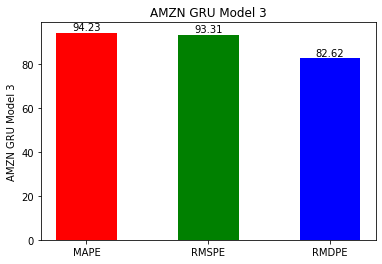

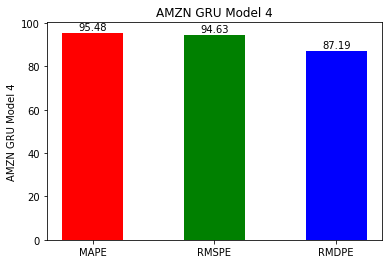

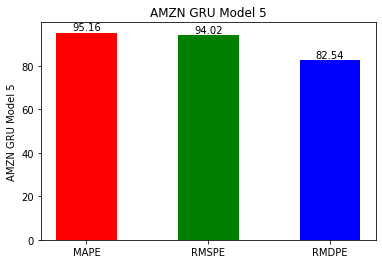

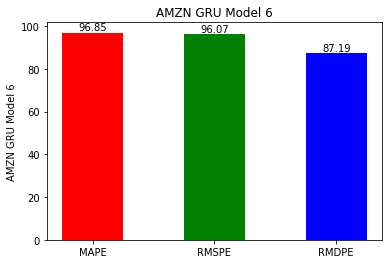

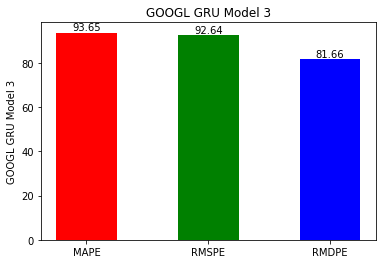

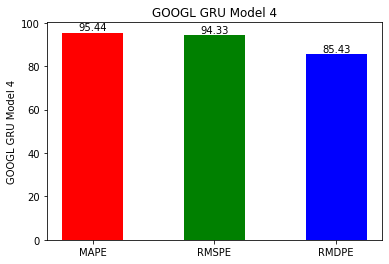

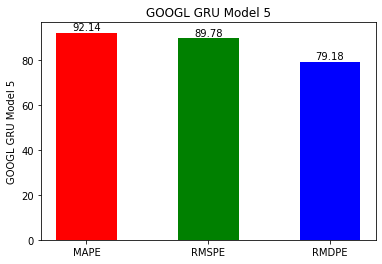

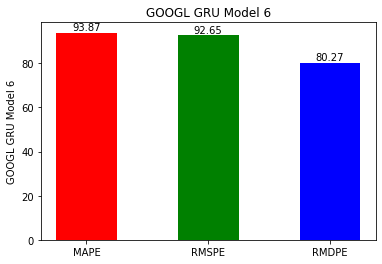

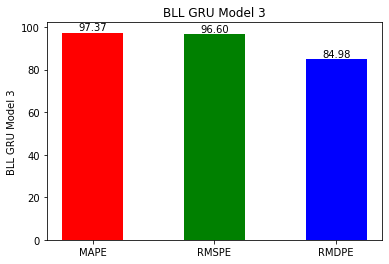

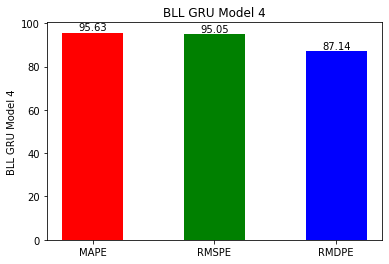

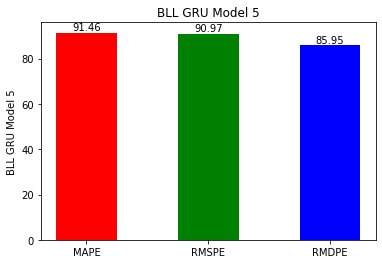

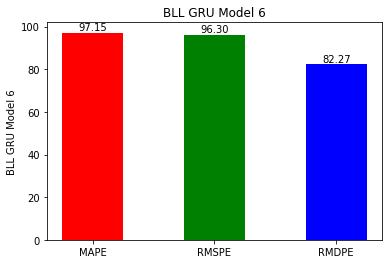

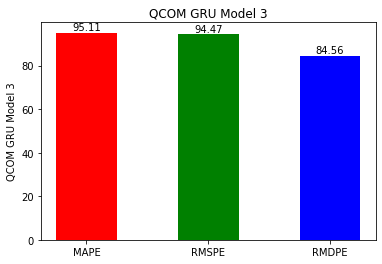

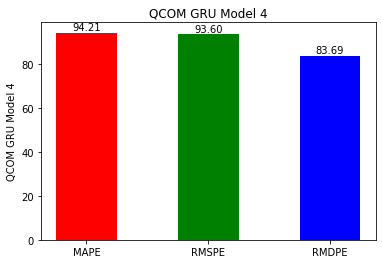

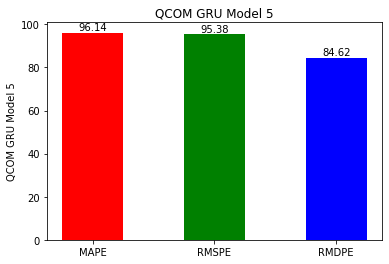

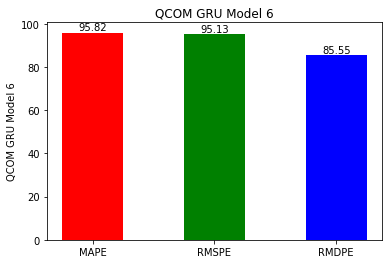

In [ ]:
# Visualization accuracy model

#AMZN
amzn_gru_model3 = [accuracy_mape_amzn_model3_gru,accuracy_rmspe_amzn_model3_gru,accuracy_rmdpe_amzn_model3_gru]
amzn_gru_model4 = [accuracy_mape_amzn_model4_gru,accuracy_rmspe_amzn_model4_gru,accuracy_rmdpe_amzn_model4_gru]
amzn_gru_model5 = [accuracy_mape_amzn_model5_gru,accuracy_rmspe_amzn_model5_gru,accuracy_rmdpe_amzn_model5_gru]
amzn_gru_model6 = [accuracy_mape_amzn_model6_gru,accuracy_rmspe_amzn_model6_gru,accuracy_rmdpe_amzn_model6_gru]

j = 1
colors = ['r','g','b']

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_gru_model3, width= 0.5, color=colors)
for i in range(len(amzn_gru_model3)):
    plt.annotate('%.2f'%amzn_gru_model3[i], (i, amzn_gru_model3[i] + j),horizontalalignment='center')
plt.ylabel('AMZN GRU Model 3')
plt.title('AMZN GRU Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_gru_model4, width= 0.5, color=colors)
for i in range(len(amzn_gru_model4)):
    plt.annotate('%.2f'%amzn_gru_model4[i], (i, amzn_gru_model4[i] + j),horizontalalignment='center')
plt.ylabel('AMZN GRU Model 4')
plt.title('AMZN GRU Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_gru_model5, width= 0.5, color=colors)
for i in range(len(amzn_gru_model5)):
    plt.annotate('%.2f'%amzn_gru_model5[i], (i, amzn_gru_model5[i] + j),horizontalalignment='center')
plt.ylabel('AMZN GRU Model 5')
plt.title('AMZN GRU Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_gru_model6, width= 0.5, color=colors)
for i in range(len(amzn_gru_model6)):
    plt.annotate('%.2f'%amzn_gru_model6[i], (i, amzn_gru_model6[i] + j),horizontalalignment='center')
plt.ylabel('AMZN GRU Model 6')
plt.title('AMZN GRU Model 6')
plt.show()

#GOOGL
googl_gru_model3 = [accuracy_mape_googl_model3_gru,accuracy_rmspe_googl_model3_gru,accuracy_rmdpe_googl_model3_gru]
googl_gru_model4 = [accuracy_mape_googl_model4_gru,accuracy_rmspe_googl_model4_gru,accuracy_rmdpe_googl_model4_gru]
googl_gru_model5 = [accuracy_mape_googl_model5_gru,accuracy_rmspe_googl_model5_gru,accuracy_rmdpe_googl_model5_gru]
googl_gru_model6 = [accuracy_mape_googl_model6_gru,accuracy_rmspe_googl_model6_gru,accuracy_rmdpe_googl_model6_gru]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], googl_gru_model3, width= 0.5, color=colors)
for i in range(len(googl_gru_model3)):
    plt.annotate('%.2f'%googl_gru_model3[i], (i, googl_gru_model3[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL GRU Model 3')
plt.title('GOOGL GRU Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_gru_model4, width= 0.5, color=colors)
for i in range(len(googl_gru_model4)):
    plt.annotate('%.2f'%googl_gru_model4[i], (i, googl_gru_model4[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL GRU Model 4')
plt.title('GOOGL GRU Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_gru_model5, width= 0.5, color=colors)
for i in range(len(googl_gru_model5)):
    plt.annotate('%.2f'%googl_gru_model5[i], (i, googl_gru_model5[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL GRU Model 5')
plt.title('GOOGL GRU Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_gru_model6, width= 0.5, color=colors)
for i in range(len(googl_gru_model6)):
    plt.annotate('%.2f'%googl_gru_model6[i], (i, googl_gru_model6[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL GRU Model 6')
plt.title('GOOGL GRU Model 6')
plt.show()

#BLL
bll_gru_model3 = [accuracy_mape_bll_model3_gru,accuracy_rmspe_bll_model3_gru,accuracy_rmdpe_bll_model3_gru]
bll_gru_model4 = [accuracy_mape_bll_model4_gru,accuracy_rmspe_bll_model4_gru,accuracy_rmdpe_bll_model4_gru]
bll_gru_model5 = [accuracy_mape_bll_model5_gru,accuracy_rmspe_bll_model5_gru,accuracy_rmdpe_bll_model5_gru]
bll_gru_model6 = [accuracy_mape_bll_model6_gru,accuracy_rmspe_bll_model6_gru,accuracy_rmdpe_bll_model6_gru]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], bll_gru_model3, width= 0.5, color=colors)
for i in range(len(bll_gru_model3)):
    plt.annotate('%.2f'%bll_gru_model3[i], (i, bll_gru_model3[i] + j),horizontalalignment='center')
plt.ylabel('BLL GRU Model 3')
plt.title('BLL GRU Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_gru_model4, width= 0.5, color=colors)
for i in range(len(bll_gru_model4)):
    plt.annotate('%.2f'%bll_gru_model4[i], (i, bll_gru_model4[i] + j),horizontalalignment='center')
plt.ylabel('BLL GRU Model 4')
plt.title('BLL GRU Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_gru_model5, width= 0.5, color=colors)
for i in range(len(bll_gru_model5)):
    plt.annotate('%.2f'%bll_gru_model5[i], (i, bll_gru_model5[i] + j),horizontalalignment='center')
plt.ylabel('BLL GRU Model 5')
plt.title('BLL GRU Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_gru_model6, width= 0.5, color=colors)
for i in range(len(bll_gru_model6)):
    plt.annotate('%.2f'%bll_gru_model6[i], (i, bll_gru_model6[i] + j),horizontalalignment='center')
plt.ylabel('BLL GRU Model 6')
plt.title('BLL GRU Model 6')
plt.show()

#QCOM
qcom_gru_model3 = [accuracy_mape_qcom_model3_gru,accuracy_rmspe_qcom_model3_gru,accuracy_rmdpe_qcom_model3_gru]
qcom_gru_model4 = [accuracy_mape_qcom_model4_gru,accuracy_rmspe_qcom_model4_gru,accuracy_rmdpe_qcom_model4_gru]
qcom_gru_model5 = [accuracy_mape_qcom_model5_gru,accuracy_rmspe_qcom_model5_gru,accuracy_rmdpe_qcom_model5_gru]
qcom_gru_model6 = [accuracy_mape_qcom_model6_gru,accuracy_rmspe_qcom_model6_gru,accuracy_rmdpe_qcom_model6_gru]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], qcom_gru_model3, width= 0.5, color=colors)
for i in range(len(qcom_gru_model3)):
    plt.annotate('%.2f'%qcom_gru_model3[i], (i, qcom_gru_model3[i] + j),horizontalalignment='center')
plt.ylabel('QCOM GRU Model 3')
plt.title('QCOM GRU Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_gru_model4, width= 0.5, color=colors)
for i in range(len(qcom_gru_model4)):
    plt.annotate('%.2f'%qcom_gru_model4[i], (i, qcom_gru_model4[i] + j),horizontalalignment='center')
plt.ylabel('QCOM GRU Model 4')
plt.title('QCOM GRU Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_gru_model5, width= 0.5, color=colors)
for i in range(len(qcom_gru_model5)):
    plt.annotate('%.2f'%qcom_gru_model5[i], (i, qcom_gru_model5[i] + j),horizontalalignment='center')
plt.ylabel('QCOM GRU Model 5')
plt.title('QCOM GRU Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_gru_model6, width= 0.5, color=colors)
for i in range(len(qcom_gru_model6)):
    plt.annotate('%.2f'%qcom_gru_model6[i], (i, qcom_gru_model6[i] + j),horizontalalignment='center')
plt.ylabel('QCOM GRU Model 6')
plt.title('QCOM GRU Model 6')
plt.show()